In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import math
import numpy as np

In [18]:
results = pd.read_csv('../Results/results.csv')
results

,org_dataset,dataset,group,scenario,xgb_score,rfc_score,knn_score
0,LoL_Stats,LoL_Stats_1,Brak,Brak przygotowania,0.550000,0.425000,0.375000
1,LoL_Stats,LoL_Stats_1,Wypełnienie_brakujących,Wypełnienie średnią,0.571429,0.489796,0.551020
2,LoL_Stats,LoL_Stats_1,Wypełnienie_brakujących,Wypełnienie minimum,0.571429,0.469388,0.591837
3,LoL_Stats,LoL_Stats_1,Wypełnienie_brakujących,Wypełnienie maksimum,0.571429,0.530612,0.551020
4,LoL_Stats,LoL_Stats_2,Brak,Brak przygotowania,0.600000,0.450000,0.475000
...,...,...,...,...,...,...,...
94,Titanic,Titanic_2,Kodowanie,Kod. war. kategorycznych + wyp. brak. średnią,1.000000,1.000000,0.700000
95,Titanic,Titanic_2,Custom,Custom preprocessing,1.000000,1.000000,0.833333
96,Titanic,Titanic_3,Kodowanie,Kodowanie wartości kategorycznych,1.000000,1.000000,0.631579
97,Titanic,Titanic_3,Kodowanie,Kod. war. kategorycznych + wyp. brak. średnią,1.000000,1.000000,0.666667


In [19]:
results['average_score'] = sum([results['xgb_score'],results['rfc_score'],results['knn_score']])/3
results

,org_dataset,dataset,group,scenario,xgb_score,rfc_score,knn_score,average_score
0,LoL_Stats,LoL_Stats_1,Brak,Brak przygotowania,0.550000,0.425000,0.375000,0.450000
1,LoL_Stats,LoL_Stats_1,Wypełnienie_brakujących,Wypełnienie średnią,0.571429,0.489796,0.551020,0.537415
2,LoL_Stats,LoL_Stats_1,Wypełnienie_brakujących,Wypełnienie minimum,0.571429,0.469388,0.591837,0.544218
3,LoL_Stats,LoL_Stats_1,Wypełnienie_brakujących,Wypełnienie maksimum,0.571429,0.530612,0.551020,0.551020
4,LoL_Stats,LoL_Stats_2,Brak,Brak przygotowania,0.600000,0.450000,0.475000,0.508333
...,...,...,...,...,...,...,...,...
94,Titanic,Titanic_2,Kodowanie,Kod. war. kategorycznych + wyp. brak. średnią,1.000000,1.000000,0.700000,0.900000
95,Titanic,Titanic_2,Custom,Custom preprocessing,1.000000,1.000000,0.833333,0.944444
96,Titanic,Titanic_3,Kodowanie,Kodowanie wartości kategorycznych,1.000000,1.000000,0.631579,0.877193
97,Titanic,Titanic_3,Kodowanie,Kod. war. kategorycznych + wyp. brak. średnią,1.000000,1.000000,0.666667,0.888889


In [20]:
results['xgb_deviation'] = results['xgb_score'] - results['average_score']
results['rfc_deviation'] = results['rfc_score'] - results['average_score']
results['knn_deviation'] = results['knn_score'] - results['average_score']
results

,org_dataset,dataset,group,scenario,xgb_score,rfc_score,knn_score,average_score,xgb_deviation,rfc_deviation,knn_deviation
0,LoL_Stats,LoL_Stats_1,Brak,Brak przygotowania,0.550000,0.425000,0.375000,0.450000,0.100000,-0.025000,-0.075000
1,LoL_Stats,LoL_Stats_1,Wypełnienie_brakujących,Wypełnienie średnią,0.571429,0.489796,0.551020,0.537415,0.034014,-0.047619,0.013605
2,LoL_Stats,LoL_Stats_1,Wypełnienie_brakujących,Wypełnienie minimum,0.571429,0.469388,0.591837,0.544218,0.027211,-0.074830,0.047619
3,LoL_Stats,LoL_Stats_1,Wypełnienie_brakujących,Wypełnienie maksimum,0.571429,0.530612,0.551020,0.551020,0.020408,-0.020408,0.000000
4,LoL_Stats,LoL_Stats_2,Brak,Brak przygotowania,0.600000,0.450000,0.475000,0.508333,0.091667,-0.058333,-0.033333
...,...,...,...,...,...,...,...,...,...,...,...
94,Titanic,Titanic_2,Kodowanie,Kod. war. kategorycznych + wyp. brak. średnią,1.000000,1.000000,0.700000,0.900000,0.100000,0.100000,-0.200000
95,Titanic,Titanic_2,Custom,Custom preprocessing,1.000000,1.000000,0.833333,0.944444,0.055556,0.055556,-0.111111
96,Titanic,Titanic_3,Kodowanie,Kodowanie wartości kategorycznych,1.000000,1.000000,0.631579,0.877193,0.122807,0.122807,-0.245614
97,Titanic,Titanic_3,Kodowanie,Kod. war. kategorycznych + wyp. brak. średnią,1.000000,1.000000,0.666667,0.888889,0.111111,0.111111,-0.222222


In [21]:
results['xgb_dev_sq'] = results['xgb_deviation'] * results['xgb_deviation']
results['rfc_dev_sq'] = results['rfc_deviation'] * results['rfc_deviation']
results['knn_dev_sq'] = results['knn_deviation'] * results['knn_deviation']
results

,org_dataset,dataset,group,scenario,xgb_score,rfc_score,knn_score,average_score,xgb_deviation,rfc_deviation,knn_deviation,xgb_dev_sq,rfc_dev_sq,knn_dev_sq
0,LoL_Stats,LoL_Stats_1,Brak,Brak przygotowania,0.550000,0.425000,0.375000,0.450000,0.100000,-0.025000,-0.075000,0.010000,0.000625,0.005625
1,LoL_Stats,LoL_Stats_1,Wypełnienie_brakujących,Wypełnienie średnią,0.571429,0.489796,0.551020,0.537415,0.034014,-0.047619,0.013605,0.001157,0.002268,0.000185
2,LoL_Stats,LoL_Stats_1,Wypełnienie_brakujących,Wypełnienie minimum,0.571429,0.469388,0.591837,0.544218,0.027211,-0.074830,0.047619,0.000740,0.005600,0.002268
3,LoL_Stats,LoL_Stats_1,Wypełnienie_brakujących,Wypełnienie maksimum,0.571429,0.530612,0.551020,0.551020,0.020408,-0.020408,0.000000,0.000416,0.000416,0.000000
4,LoL_Stats,LoL_Stats_2,Brak,Brak przygotowania,0.600000,0.450000,0.475000,0.508333,0.091667,-0.058333,-0.033333,0.008403,0.003403,0.001111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Titanic,Titanic_2,Kodowanie,Kod. war. kategorycznych + wyp. brak. średnią,1.000000,1.000000,0.700000,0.900000,0.100000,0.100000,-0.200000,0.010000,0.010000,0.040000
95,Titanic,Titanic_2,Custom,Custom preprocessing,1.000000,1.000000,0.833333,0.944444,0.055556,0.055556,-0.111111,0.003086,0.003086,0.012346
96,Titanic,Titanic_3,Kodowanie,Kodowanie wartości kategorycznych,1.000000,1.000000,0.631579,0.877193,0.122807,0.122807,-0.245614,0.015082,0.015082,0.060326
97,Titanic,Titanic_3,Kodowanie,Kod. war. kategorycznych + wyp. brak. średnią,1.000000,1.000000,0.666667,0.888889,0.111111,0.111111,-0.222222,0.012346,0.012346,0.049383


In [22]:
results['sum_of_sq'] = results['xgb_dev_sq'] + results['rfc_dev_sq'] + results['knn_dev_sq']
results

,org_dataset,dataset,group,scenario,xgb_score,rfc_score,knn_score,average_score,xgb_deviation,rfc_deviation,knn_deviation,xgb_dev_sq,rfc_dev_sq,knn_dev_sq,sum_of_sq
0,LoL_Stats,LoL_Stats_1,Brak,Brak przygotowania,0.550000,0.425000,0.375000,0.450000,0.100000,-0.025000,-0.075000,0.010000,0.000625,0.005625,0.016250
1,LoL_Stats,LoL_Stats_1,Wypełnienie_brakujących,Wypełnienie średnią,0.571429,0.489796,0.551020,0.537415,0.034014,-0.047619,0.013605,0.001157,0.002268,0.000185,0.003610
2,LoL_Stats,LoL_Stats_1,Wypełnienie_brakujących,Wypełnienie minimum,0.571429,0.469388,0.591837,0.544218,0.027211,-0.074830,0.047619,0.000740,0.005600,0.002268,0.008608
3,LoL_Stats,LoL_Stats_1,Wypełnienie_brakujących,Wypełnienie maksimum,0.571429,0.530612,0.551020,0.551020,0.020408,-0.020408,0.000000,0.000416,0.000416,0.000000,0.000833
4,LoL_Stats,LoL_Stats_2,Brak,Brak przygotowania,0.600000,0.450000,0.475000,0.508333,0.091667,-0.058333,-0.033333,0.008403,0.003403,0.001111,0.012917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Titanic,Titanic_2,Kodowanie,Kod. war. kategorycznych + wyp. brak. średnią,1.000000,1.000000,0.700000,0.900000,0.100000,0.100000,-0.200000,0.010000,0.010000,0.040000,0.060000
95,Titanic,Titanic_2,Custom,Custom preprocessing,1.000000,1.000000,0.833333,0.944444,0.055556,0.055556,-0.111111,0.003086,0.003086,0.012346,0.018519
96,Titanic,Titanic_3,Kodowanie,Kodowanie wartości kategorycznych,1.000000,1.000000,0.631579,0.877193,0.122807,0.122807,-0.245614,0.015082,0.015082,0.060326,0.090489
97,Titanic,Titanic_3,Kodowanie,Kod. war. kategorycznych + wyp. brak. średnią,1.000000,1.000000,0.666667,0.888889,0.111111,0.111111,-0.222222,0.012346,0.012346,0.049383,0.074074


In [23]:
results['variance'] = results['sum_of_sq'] / 3
results

,org_dataset,dataset,group,scenario,xgb_score,rfc_score,knn_score,average_score,xgb_deviation,rfc_deviation,knn_deviation,xgb_dev_sq,rfc_dev_sq,knn_dev_sq,sum_of_sq,variance
0,LoL_Stats,LoL_Stats_1,Brak,Brak przygotowania,0.550000,0.425000,0.375000,0.450000,0.100000,-0.025000,-0.075000,0.010000,0.000625,0.005625,0.016250,0.005417
1,LoL_Stats,LoL_Stats_1,Wypełnienie_brakujących,Wypełnienie średnią,0.571429,0.489796,0.551020,0.537415,0.034014,-0.047619,0.013605,0.001157,0.002268,0.000185,0.003610,0.001203
2,LoL_Stats,LoL_Stats_1,Wypełnienie_brakujących,Wypełnienie minimum,0.571429,0.469388,0.591837,0.544218,0.027211,-0.074830,0.047619,0.000740,0.005600,0.002268,0.008608,0.002869
3,LoL_Stats,LoL_Stats_1,Wypełnienie_brakujących,Wypełnienie maksimum,0.571429,0.530612,0.551020,0.551020,0.020408,-0.020408,0.000000,0.000416,0.000416,0.000000,0.000833,0.000278
4,LoL_Stats,LoL_Stats_2,Brak,Brak przygotowania,0.600000,0.450000,0.475000,0.508333,0.091667,-0.058333,-0.033333,0.008403,0.003403,0.001111,0.012917,0.004306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Titanic,Titanic_2,Kodowanie,Kod. war. kategorycznych + wyp. brak. średnią,1.000000,1.000000,0.700000,0.900000,0.100000,0.100000,-0.200000,0.010000,0.010000,0.040000,0.060000,0.020000
95,Titanic,Titanic_2,Custom,Custom preprocessing,1.000000,1.000000,0.833333,0.944444,0.055556,0.055556,-0.111111,0.003086,0.003086,0.012346,0.018519,0.006173
96,Titanic,Titanic_3,Kodowanie,Kodowanie wartości kategorycznych,1.000000,1.000000,0.631579,0.877193,0.122807,0.122807,-0.245614,0.015082,0.015082,0.060326,0.090489,0.030163
97,Titanic,Titanic_3,Kodowanie,Kod. war. kategorycznych + wyp. brak. średnią,1.000000,1.000000,0.666667,0.888889,0.111111,0.111111,-0.222222,0.012346,0.012346,0.049383,0.074074,0.024691


In [24]:
results['std_dev'] = np.sqrt(results['variance'])
results

,org_dataset,dataset,group,scenario,xgb_score,rfc_score,knn_score,average_score,xgb_deviation,rfc_deviation,knn_deviation,xgb_dev_sq,rfc_dev_sq,knn_dev_sq,sum_of_sq,variance,std_dev
0,LoL_Stats,LoL_Stats_1,Brak,Brak przygotowania,0.550000,0.425000,0.375000,0.450000,0.100000,-0.025000,-0.075000,0.010000,0.000625,0.005625,0.016250,0.005417,0.073598
1,LoL_Stats,LoL_Stats_1,Wypełnienie_brakujących,Wypełnienie średnią,0.571429,0.489796,0.551020,0.537415,0.034014,-0.047619,0.013605,0.001157,0.002268,0.000185,0.003610,0.001203,0.034687
2,LoL_Stats,LoL_Stats_1,Wypełnienie_brakujących,Wypełnienie minimum,0.571429,0.469388,0.591837,0.544218,0.027211,-0.074830,0.047619,0.000740,0.005600,0.002268,0.008608,0.002869,0.053565
3,LoL_Stats,LoL_Stats_1,Wypełnienie_brakujących,Wypełnienie maksimum,0.571429,0.530612,0.551020,0.551020,0.020408,-0.020408,0.000000,0.000416,0.000416,0.000000,0.000833,0.000278,0.016663
4,LoL_Stats,LoL_Stats_2,Brak,Brak przygotowania,0.600000,0.450000,0.475000,0.508333,0.091667,-0.058333,-0.033333,0.008403,0.003403,0.001111,0.012917,0.004306,0.065617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Titanic,Titanic_2,Kodowanie,Kod. war. kategorycznych + wyp. brak. średnią,1.000000,1.000000,0.700000,0.900000,0.100000,0.100000,-0.200000,0.010000,0.010000,0.040000,0.060000,0.020000,0.141421
95,Titanic,Titanic_2,Custom,Custom preprocessing,1.000000,1.000000,0.833333,0.944444,0.055556,0.055556,-0.111111,0.003086,0.003086,0.012346,0.018519,0.006173,0.078567
96,Titanic,Titanic_3,Kodowanie,Kodowanie wartości kategorycznych,1.000000,1.000000,0.631579,0.877193,0.122807,0.122807,-0.245614,0.015082,0.015082,0.060326,0.090489,0.030163,0.173675
97,Titanic,Titanic_3,Kodowanie,Kod. war. kategorycznych + wyp. brak. średnią,1.000000,1.000000,0.666667,0.888889,0.111111,0.111111,-0.222222,0.012346,0.012346,0.049383,0.074074,0.024691,0.157135


In [25]:
results['std_err'] = results['std_dev']/math.sqrt(3)
results

,org_dataset,dataset,group,scenario,xgb_score,rfc_score,knn_score,average_score,xgb_deviation,rfc_deviation,knn_deviation,xgb_dev_sq,rfc_dev_sq,knn_dev_sq,sum_of_sq,variance,std_dev,std_err
0,LoL_Stats,LoL_Stats_1,Brak,Brak przygotowania,0.550000,0.425000,0.375000,0.450000,0.100000,-0.025000,-0.075000,0.010000,0.000625,0.005625,0.016250,0.005417,0.073598,0.042492
1,LoL_Stats,LoL_Stats_1,Wypełnienie_brakujących,Wypełnienie średnią,0.571429,0.489796,0.551020,0.537415,0.034014,-0.047619,0.013605,0.001157,0.002268,0.000185,0.003610,0.001203,0.034687,0.020027
2,LoL_Stats,LoL_Stats_1,Wypełnienie_brakujących,Wypełnienie minimum,0.571429,0.469388,0.591837,0.544218,0.027211,-0.074830,0.047619,0.000740,0.005600,0.002268,0.008608,0.002869,0.053565,0.030926
3,LoL_Stats,LoL_Stats_1,Wypełnienie_brakujących,Wypełnienie maksimum,0.571429,0.530612,0.551020,0.551020,0.020408,-0.020408,0.000000,0.000416,0.000416,0.000000,0.000833,0.000278,0.016663,0.009621
4,LoL_Stats,LoL_Stats_2,Brak,Brak przygotowania,0.600000,0.450000,0.475000,0.508333,0.091667,-0.058333,-0.033333,0.008403,0.003403,0.001111,0.012917,0.004306,0.065617,0.037884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Titanic,Titanic_2,Kodowanie,Kod. war. kategorycznych + wyp. brak. średnią,1.000000,1.000000,0.700000,0.900000,0.100000,0.100000,-0.200000,0.010000,0.010000,0.040000,0.060000,0.020000,0.141421,0.081650
95,Titanic,Titanic_2,Custom,Custom preprocessing,1.000000,1.000000,0.833333,0.944444,0.055556,0.055556,-0.111111,0.003086,0.003086,0.012346,0.018519,0.006173,0.078567,0.045361
96,Titanic,Titanic_3,Kodowanie,Kodowanie wartości kategorycznych,1.000000,1.000000,0.631579,0.877193,0.122807,0.122807,-0.245614,0.015082,0.015082,0.060326,0.090489,0.030163,0.173675,0.100272
97,Titanic,Titanic_3,Kodowanie,Kod. war. kategorycznych + wyp. brak. średnią,1.000000,1.000000,0.666667,0.888889,0.111111,0.111111,-0.222222,0.012346,0.012346,0.049383,0.074074,0.024691,0.157135,0.090722


In [26]:
results['scenario'].unique()

array(['Brak przygotowania', 'Wypełnienie średnią', 'Wypełnienie minimum',
       'Wypełnienie maksimum', 'Wypełnienie regresją', 'Standaryzacja',
       'Skalowanie do (0-1)', 'Skalowanie (0-1) + usuw. odstających',
       'Kodowanie wartości kategorycznych',
       'Kod. war. kategorycznych + wyp. brak. średnią',
       'Custom preprocessing'], dtype=object)

In [27]:
results['dataset'].unique()

array(['LoL_Stats_1', 'LoL_Stats_2', 'LoL_Stats_3', 'Aus_weather_1',
       'Aus_weather_2', 'Aus_weather_3', 'Titanic_1', 'Titanic_2',
       'Titanic_3'], dtype=object)

In [28]:
results['group'].unique()

array(['Brak', 'Wypełnienie_brakujących', 'Standaryzacja', 'Kodowanie',
       'Custom'], dtype=object)

In [29]:
def get_dataset_results(dataset):
    data_res = results.loc[results['dataset'] == dataset]
    return data_res

In [30]:
def get_group_results(dataset,group):
    data_res = dataset.loc[dataset['group'] == "Brak"] 
    data_res = data_res.append(dataset.loc[dataset['group'] == group])
    return data_res

In [31]:
def get_dataset_group_results(dataset,group):
    return results.loc[(results['org_dataset'] == dataset) & ((results['group'] == group) | (results['group'] == "Brak"))]

In [32]:
titanic_1 = get_dataset_results('Titanic_1')
titanic_2 = get_dataset_results('Titanic_2')
titanic_3 = get_dataset_results('Titanic_3')

In [33]:
aus_weather_1 = get_dataset_results('Aus_weather_1')
aus_weather_2 = get_dataset_results('Aus_weather_2')
aus_weather_3 = get_dataset_results('Aus_weather_3')

In [34]:
lol_stats_1 = get_dataset_results('LoL_Stats_1')
lol_stats_2 = get_dataset_results('LoL_Stats_2')
lol_stats_3 = get_dataset_results('LoL_Stats_3')

In [35]:
def plot_dataset(dataset, title, filename):
    x1 = dataset['scenario'].unique()
    y1 = dataset['xgb_score']
    y2 = dataset['rfc_score']
    y3 = dataset['knn_score']
    plt.figure(figsize=(8,4))
    plt.xticks(rotation = 30)
    plt.scatter(x1,y1, color='blue', linewidth = 3,  label = 'xgb_score', marker='o')
    plt.scatter(x1,y2, color='red', linewidth = 3,  label = 'rfc_score', marker='x')
    plt.scatter(x1,y3, color='green', linewidth = 3,  label = 'knn_score', marker='+')
    plt.xlabel('Scenariusz')
    plt.ylabel('Trafność')
    plt.title(title)
    plt.legend()
    plt.savefig('../Praca/Wykresy/'+filename+'.png', bbox_inches='tight')
    # plt.show()

In [36]:
def plot_average(dataset_1, dataset_2, dataset_3, title, filename):
    x1 = dataset_1['scenario'].unique()
    y1 = dataset_1['average_score']
    y2 = dataset_2['average_score']
    y3 = dataset_3['average_score']
    e1 = dataset_1['std_err']
    e2 = dataset_2['std_err']
    e3 = dataset_3['std_err']
    plt.figure(figsize=(8,4))
    plt.xticks(rotation = 30)
    plt.errorbar(x1,y1,e1,linestyle='None', color='blue',  label = dataset_1['dataset'].unique()[0], marker='o')
    plt.errorbar(x1,y2,e2,linestyle='None', color='red',  label = dataset_2['dataset'].unique()[0], marker='x')
    plt.errorbar(x1,y3,e3,linestyle='None', color='green',  label = dataset_3['dataset'].unique()[0], marker='+')
    plt.xlabel('Scenariusz')
    plt.ylabel('Trafność')
    plt.title(title)
    plt.legend()
    plt.savefig('../Praca/Wykresy/'+filename+'.png', bbox_inches='tight')
    # plt.show()

In [37]:
def plot_xgb_score(dataset_1, dataset_2, dataset_3, title, filename):
    x1 = dataset_1['scenario'].unique()
    y1 = dataset_1['xgb_score']
    y2 = dataset_2['xgb_score']
    y3 = dataset_3['xgb_score']
    plt.figure(figsize=(8,4))
    plt.xticks(rotation = 30)
    plt.scatter(x1,y1, color='blue', linewidth = 3,  label =  dataset_1['dataset'].unique()[0], marker='o')
    plt.scatter(x1,y2, color='red', linewidth = 3,  label =  dataset_2['dataset'].unique()[0], marker='x')
    plt.scatter(x1,y3, color='green', linewidth = 3,  label =  dataset_3['dataset'].unique()[0], marker='+')
    plt.xlabel('Scenariusz')
    plt.ylabel('Trafność')
    plt.title(title)
    plt.legend()
    plt.savefig('../Praca/Wykresy/'+filename+'.png', bbox_inches='tight')
    # plt.show()

In [38]:
def plot_rfc_score(dataset_1, dataset_2, dataset_3, title, filename):
    x1 = dataset_1['scenario'].unique()
    y1 = dataset_1['rfc_score']
    y2 = dataset_2['rfc_score']
    y3 = dataset_3['rfc_score']
    plt.figure(figsize=(8,4))
    plt.xticks(rotation = 30)
    plt.scatter(x1,y1, color='blue', linewidth = 3,  label =  dataset_1['dataset'].unique()[0], marker='o')
    plt.scatter(x1,y2, color='red', linewidth = 3,  label =  dataset_2['dataset'].unique()[0], marker='x')
    plt.scatter(x1,y3, color='green', linewidth = 3,  label =  dataset_3['dataset'].unique()[0], marker='+')
    plt.xlabel('Scenariusz')
    plt.ylabel('Trafność')
    plt.title(title)
    plt.legend()
    plt.savefig('../Praca/Wykresy/'+filename+'.png', bbox_inches='tight')
    # plt.show()

In [39]:
def plot_knn_score(dataset_1, dataset_2, dataset_3, title, filename):
    x1 = dataset_1['scenario'].unique()
    y1 = dataset_1['knn_score']
    y2 = dataset_2['knn_score']
    y3 = dataset_3['knn_score']
    plt.figure(figsize=(8,4))
    plt.xticks(rotation = 30)
    plt.scatter(x1,y1, color='blue', linewidth = 3,  label =  dataset_1['dataset'].unique()[0], marker='o')
    plt.scatter(x1,y2, color='red', linewidth = 3,  label =  dataset_1['dataset'].unique()[0], marker='x')
    plt.scatter(x1,y3, color='green', linewidth = 3,  label =  dataset_1['dataset'].unique()[0], marker='+')
    plt.xlabel('Scenariusz')
    plt.ylabel('Trafność')
    plt.title(title)
    plt.legend()
    plt.savefig('../Praca/Wykresy/'+filename+'.png', bbox_inches='tight')
    # plt.show()

In [40]:
def plot_group(dataset,dataset_name, title, filename):
    x1 = dataset['scenario'].unique()
    y1_xgb = dataset.loc[dataset['dataset'] == dataset_name+'_1']['xgb_score']
    y1_rfc = dataset.loc[dataset['dataset'] == dataset_name+'_1']['rfc_score']
    y1_knn = dataset.loc[dataset['dataset'] == dataset_name+'_1']['knn_score']
    y2_xgb = dataset.loc[dataset['dataset'] == dataset_name+'_2']['xgb_score']
    y2_rfc = dataset.loc[dataset['dataset'] == dataset_name+'_2']['rfc_score']
    y2_knn = dataset.loc[dataset['dataset'] == dataset_name+'_2']['knn_score']
    y3_xgb = dataset.loc[dataset['dataset'] == dataset_name+'_3']['xgb_score']
    y3_knn = dataset.loc[dataset['dataset'] == dataset_name+'_3']['rfc_score']
    y3_rfc = dataset.loc[dataset['dataset'] == dataset_name+'_3']['knn_score']
    plt.figure(figsize=(8,4))
    plt.xticks(rotation = 30)
    print(x1)
    print(y1_xgb)
    plt.scatter(x1,y1_xgb, color='red',  label =  "xgb_1", marker='o')
    plt.scatter(x1,y1_rfc, color='red',  label =  "rfc_1", marker='*')
    plt.scatter(x1,y1_knn, color='red',  label =  "knn_1", marker='+')
    plt.scatter(x1,y2_xgb, color='blue',  label =  "xgb_2", marker='o')
    plt.scatter(x1,y2_rfc, color='blue',  label =  "rfc_2", marker='*')
    plt.scatter(x1,y2_knn, color='blue',  label =  "knn_2", marker='+')
    plt.scatter(x1,y3_xgb, color='green',  label =  "xgb_3", marker='o')
    plt.scatter(x1,y3_rfc, color='green', label =  "rfc_3", marker='*')
    plt.scatter(x1,y3_knn, color='green',  label =  "knn_3", marker='+')
    plt.xlabel('Scenariusz')
    plt.ylabel('Trafność')
    plt.title(title)
    plt.legend()
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    # plt.tight_layout()
    plt.savefig('../Praca/Wykresy/'+filename+'.png', bbox_inches='tight')
    plt.show()

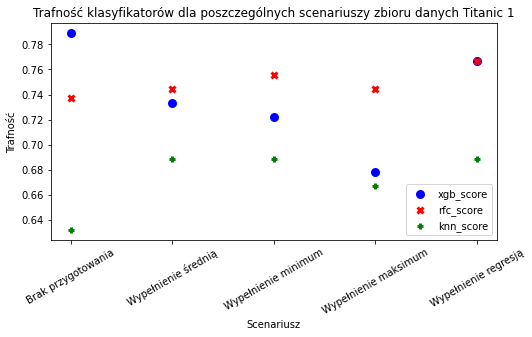

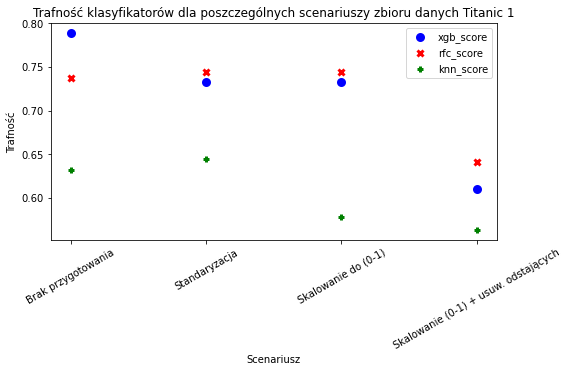

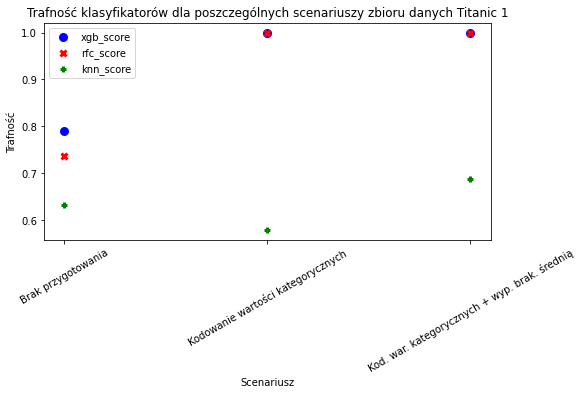

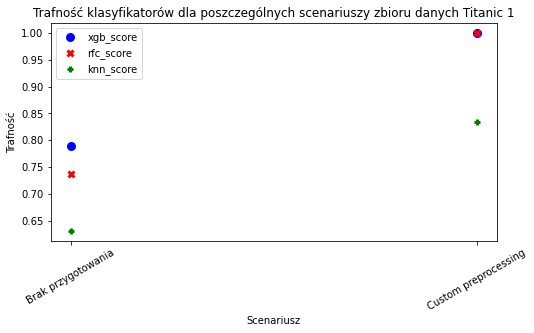

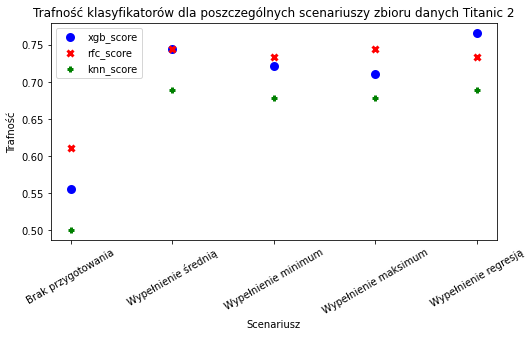

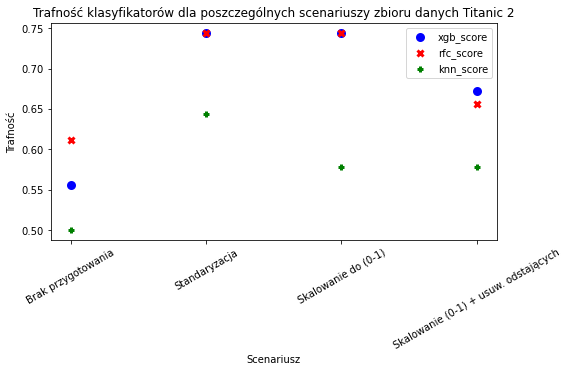

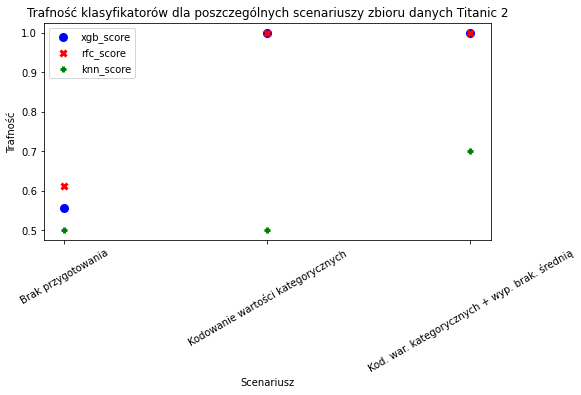

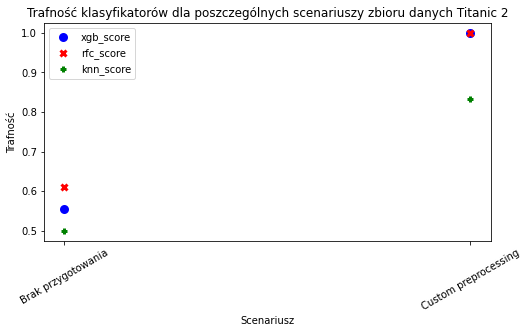

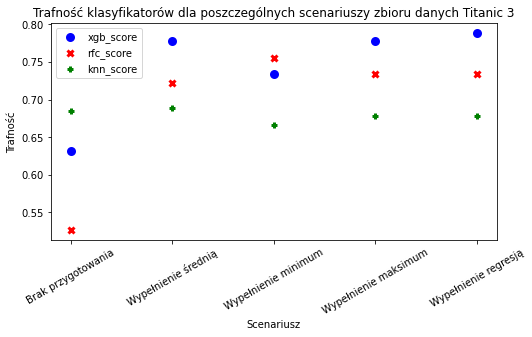

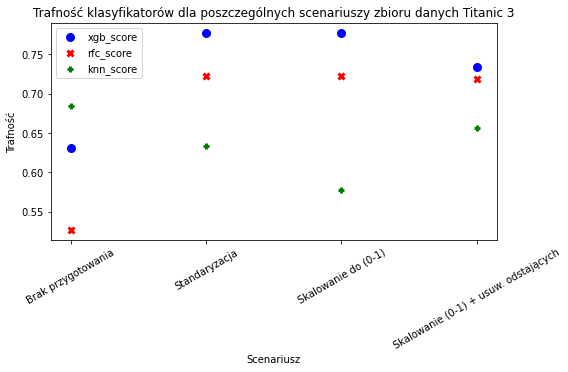

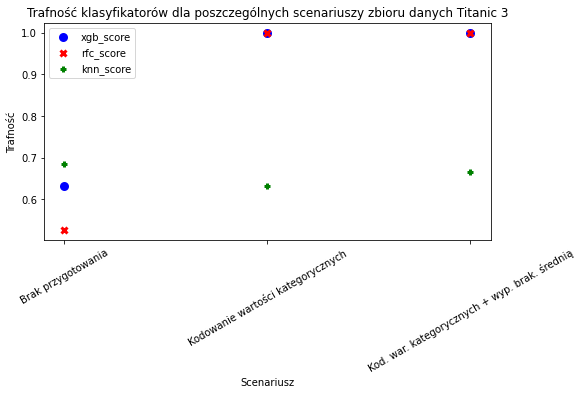

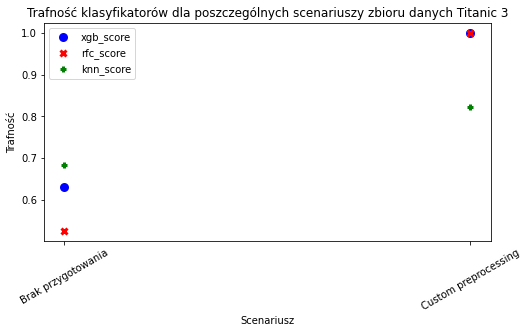

In [41]:
i = 1 
for dataset in [titanic_1,titanic_2,titanic_3]:
    for group in results['group'].unique()[1:]:
        plot_dataset(get_group_results(dataset,
                                 group),
                                 "Trafność klasyfikatorów dla poszczególnych scenariuszy zbioru danych Titanic " + str(i),
                                 "Titanic_" + str(i) + "_" + group)
    i = i + 1


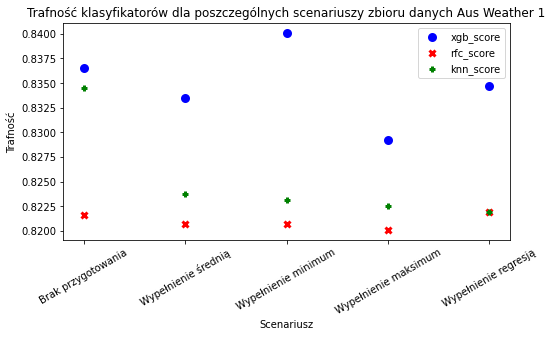

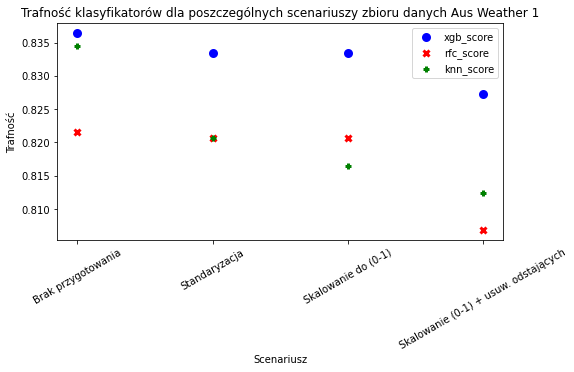

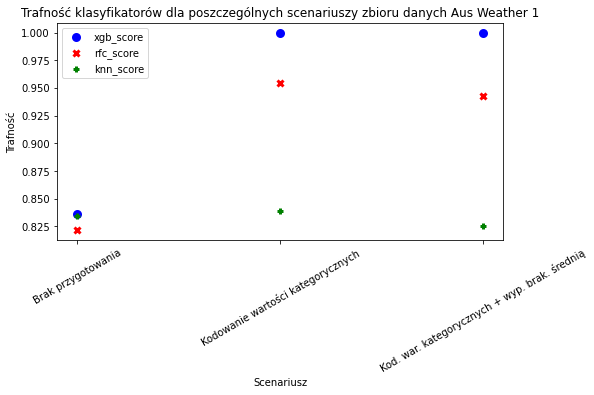

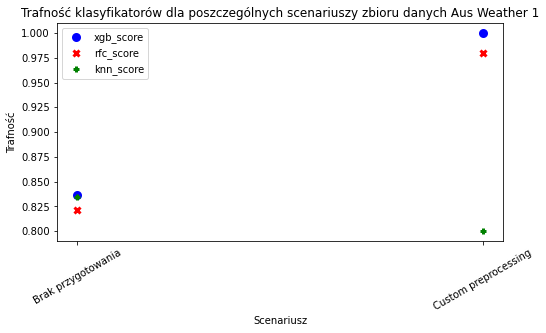

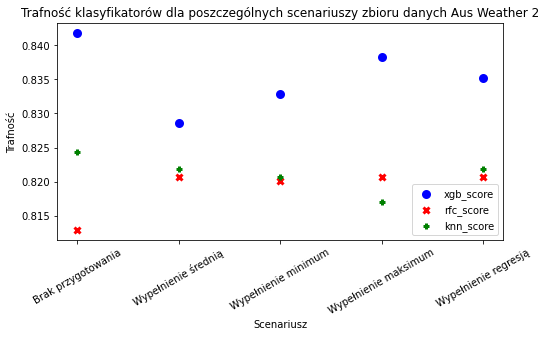

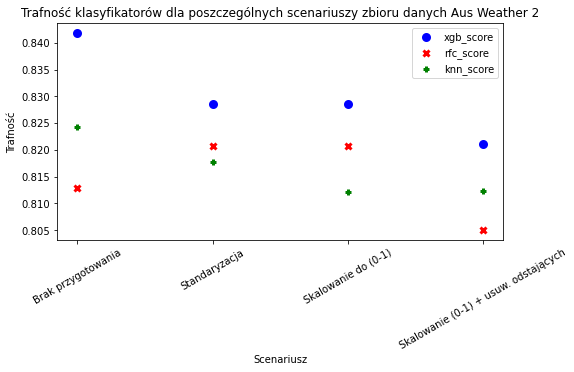

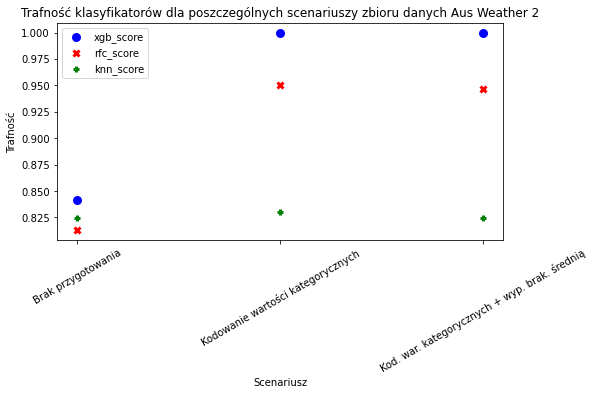

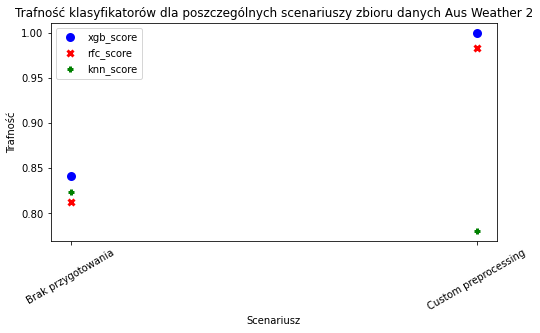

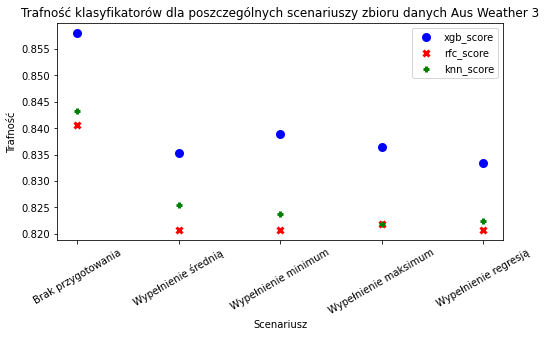

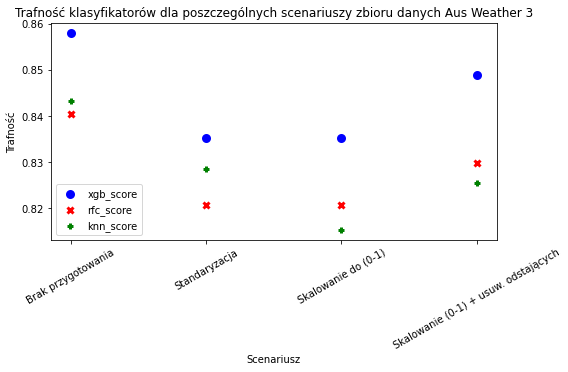

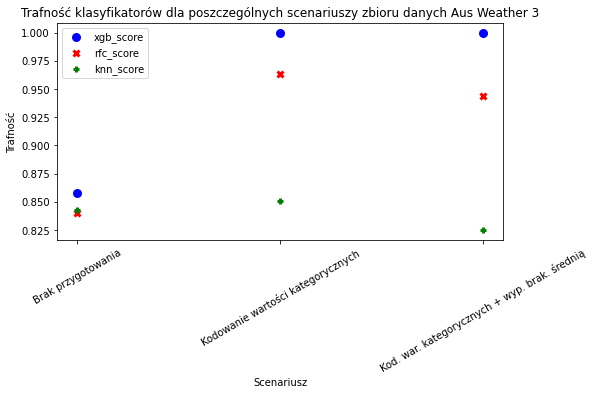

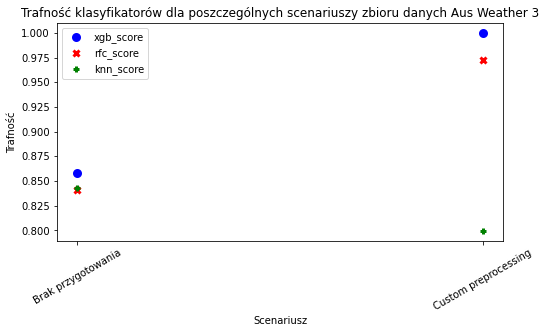

In [42]:
i = 1 
for dataset in [aus_weather_1,aus_weather_2,aus_weather_3]:
    for group in results['group'].unique()[1:]:
        plot_dataset(get_group_results(dataset,
                                 group),
                                 "Trafność klasyfikatorów dla poszczególnych scenariuszy zbioru danych Aus Weather " + str(i) ,
                                 "Aus_Weather_" + str(i) + "_" + group)
    i = i + 1


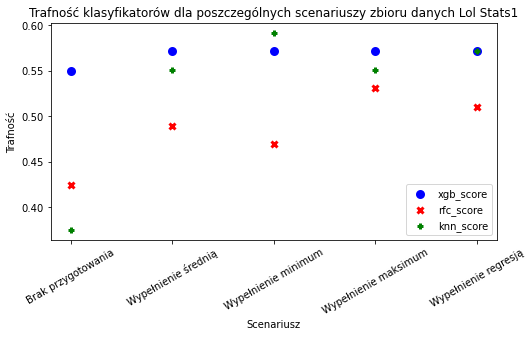

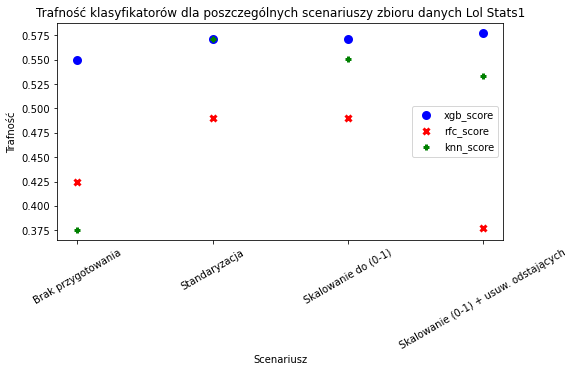

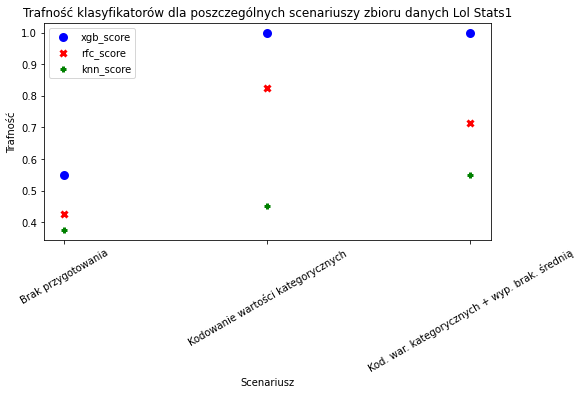

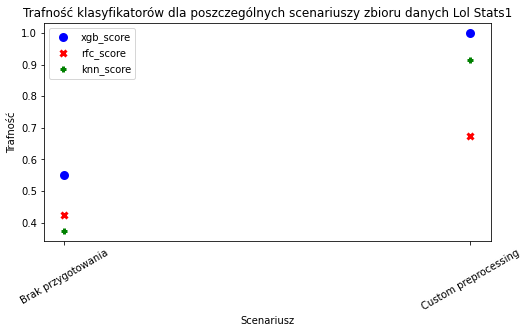

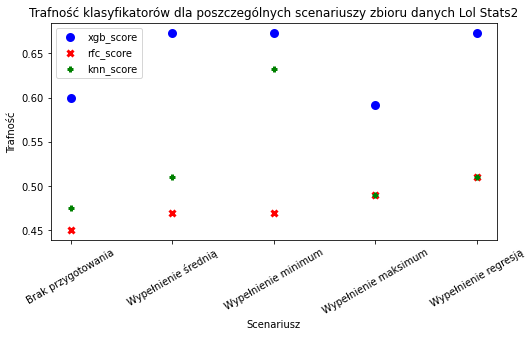

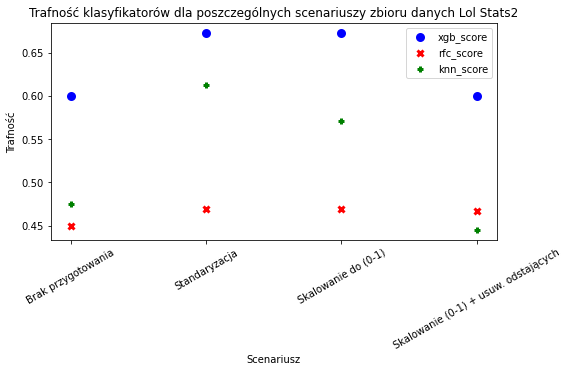

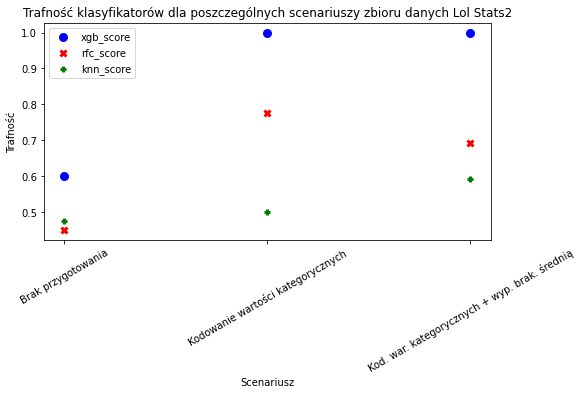

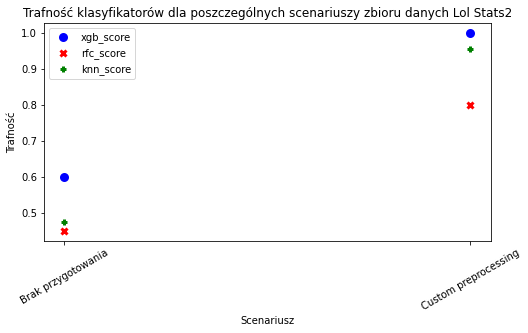

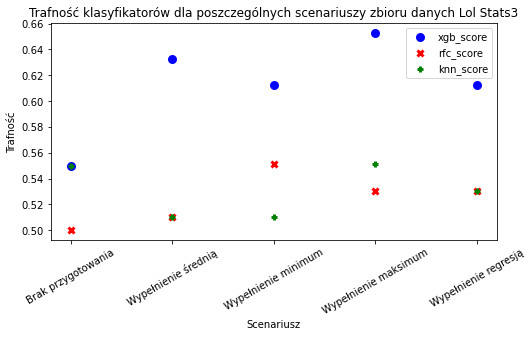

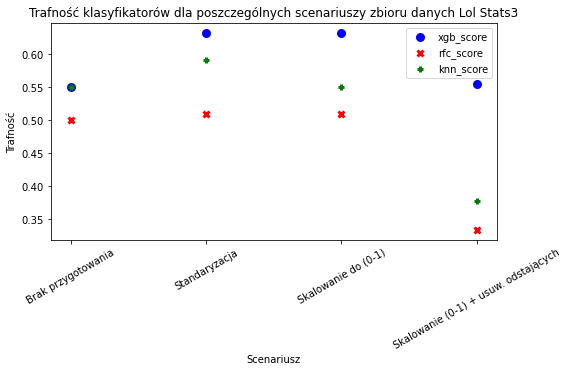

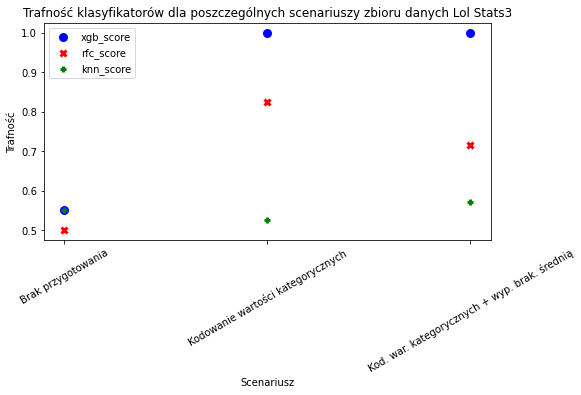

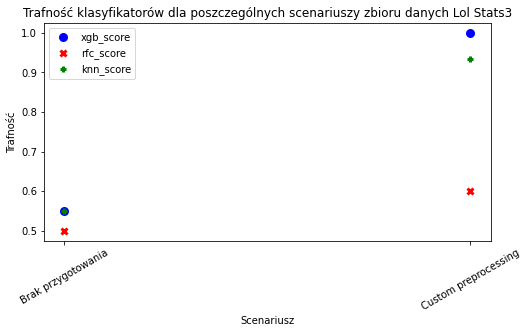

In [43]:
i = 1 
for dataset in [lol_stats_1,lol_stats_2,lol_stats_3]:
    for group in results['group'].unique()[1:]:
        plot_dataset(get_group_results(dataset,
                                 group),
                                 "Trafność klasyfikatorów dla poszczególnych scenariuszy zbioru danych Lol Stats" + str(i),
                                 "Lol_Stats_" + str(i) + "_" + group)
    i = i + 1


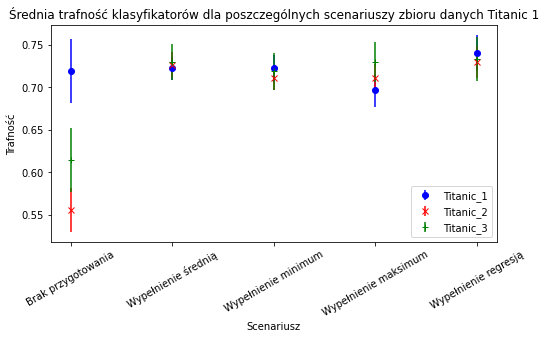

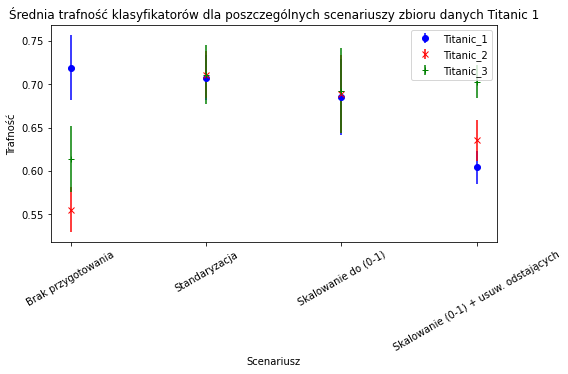

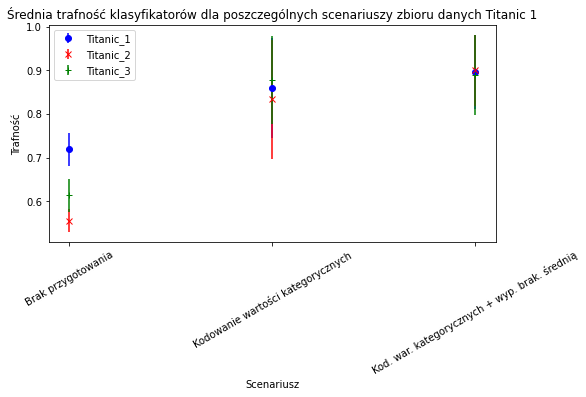

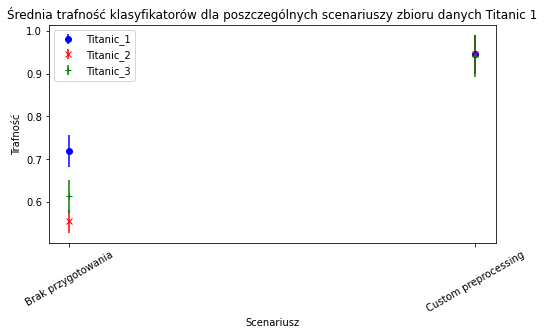

In [44]:
for group in results['group'].unique()[1:]:
        plot_average(get_group_results(titanic_1,group),
               get_group_results(titanic_2,group),
               get_group_results(titanic_3,group),
               "Średnia trafność klasyfikatorów dla poszczególnych scenariuszy zbioru danych Titanic 1",
               "Titanic_Avg_"+group)

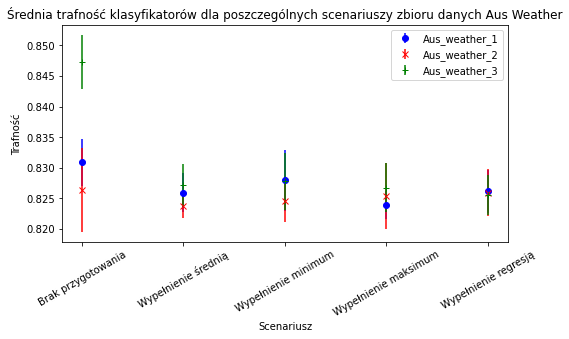

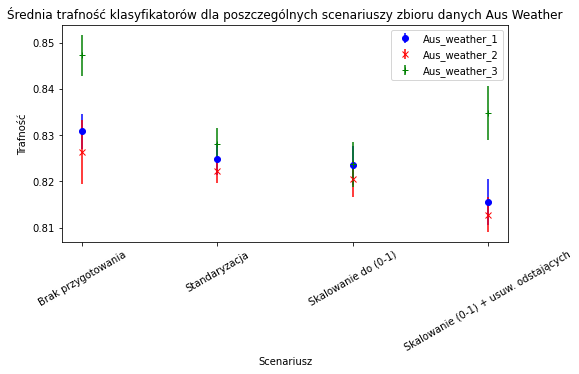

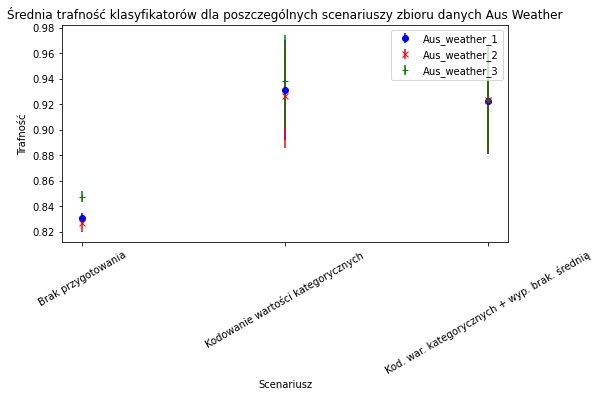

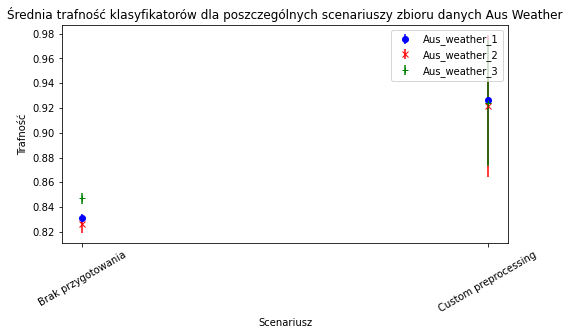

In [45]:
for group in results['group'].unique()[1:]:
        plot_average(get_group_results(aus_weather_1,group),
               get_group_results(aus_weather_2,group),
               get_group_results(aus_weather_3,group),
               "Średnia trafność klasyfikatorów dla poszczególnych scenariuszy zbioru danych Aus Weather",
               "Aus_Weather_Avg_"+group)

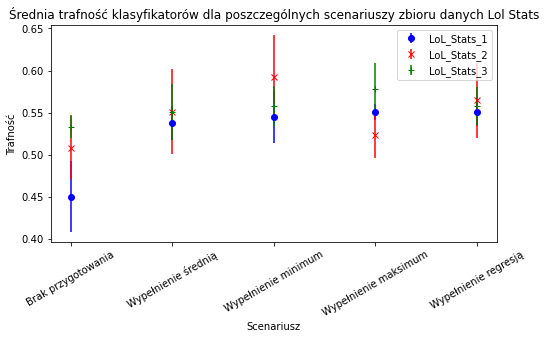

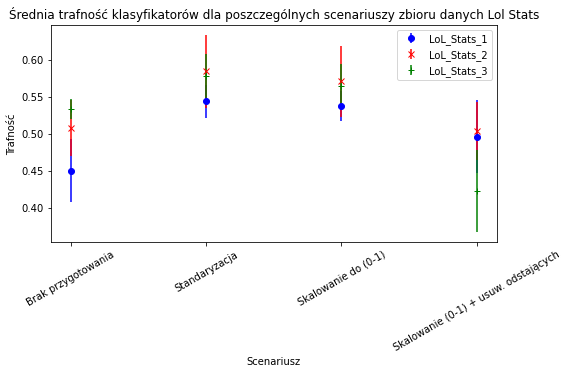

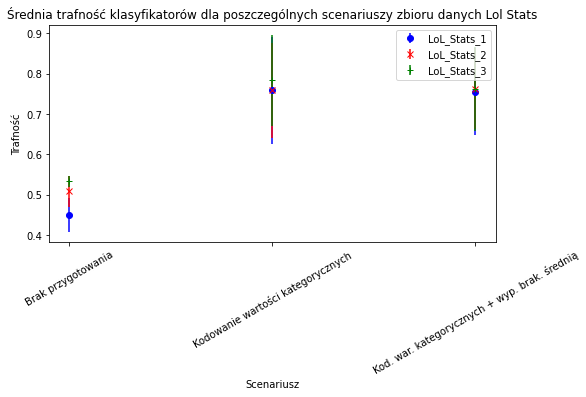

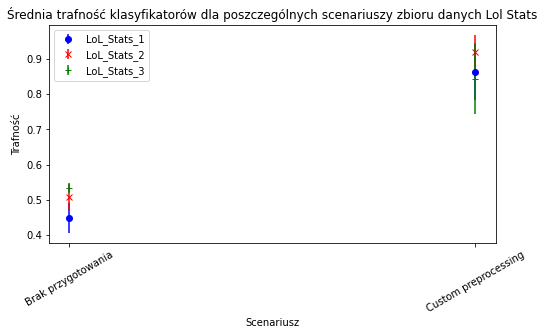

In [46]:
for group in results['group'].unique()[1:]:
        plot_average(get_group_results(lol_stats_1,group),
               get_group_results(lol_stats_2,group),
               get_group_results(lol_stats_3,group),
               "Średnia trafność klasyfikatorów dla poszczególnych scenariuszy zbioru danych Lol Stats",
               "Lol_Stats_Avg_"+group)

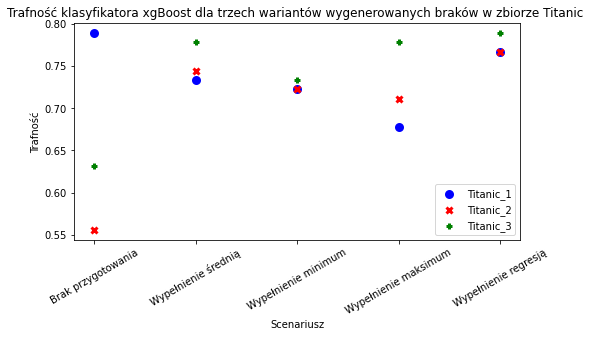

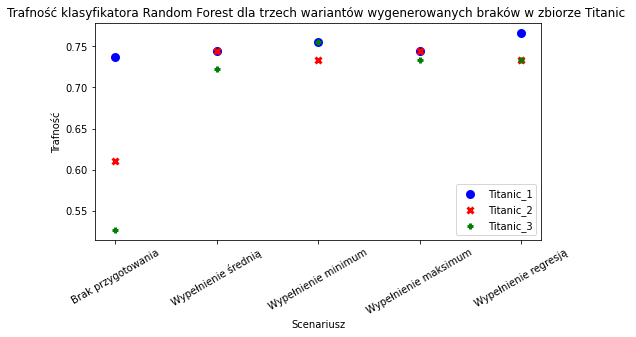

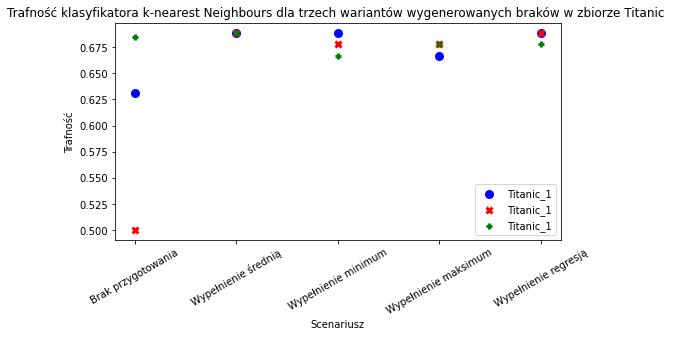

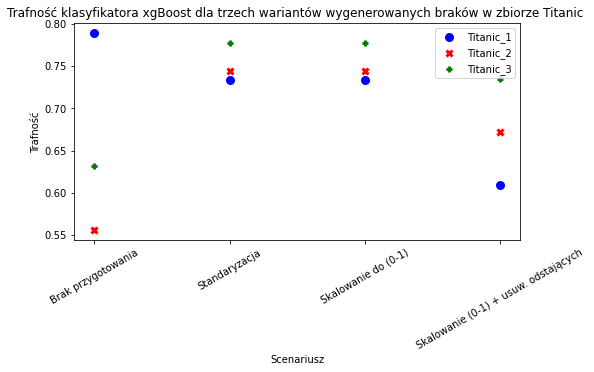

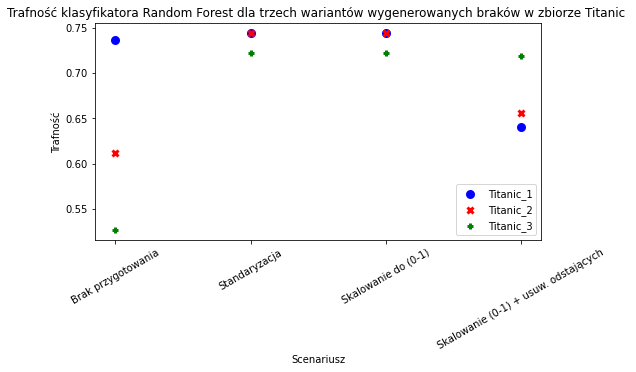

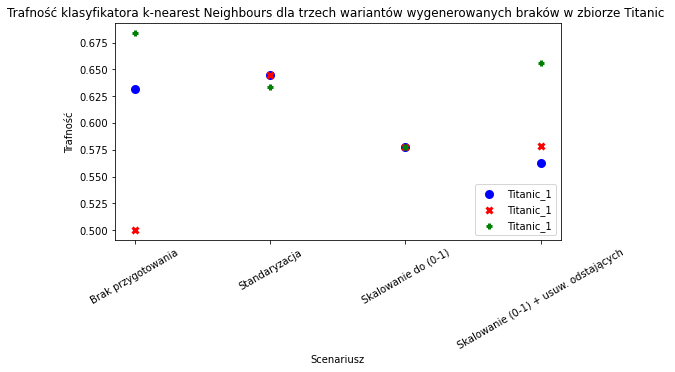

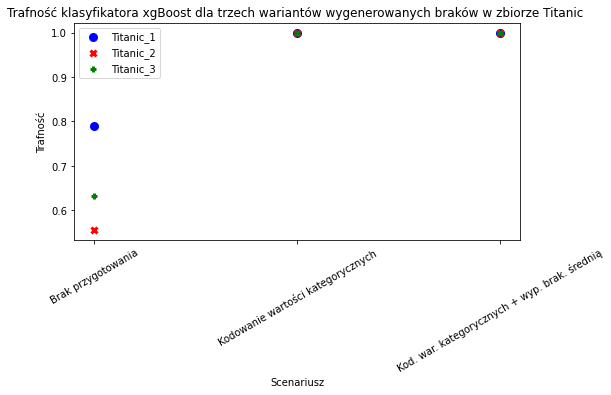

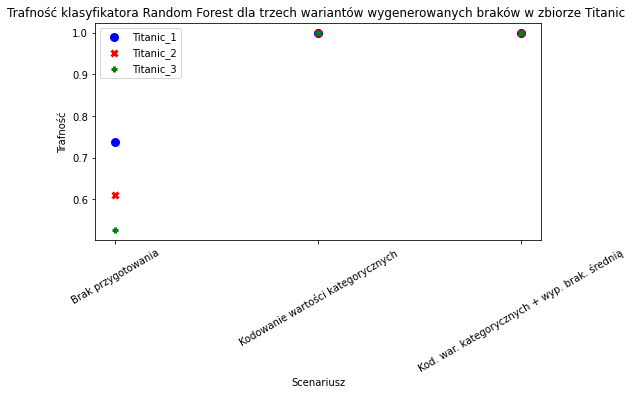

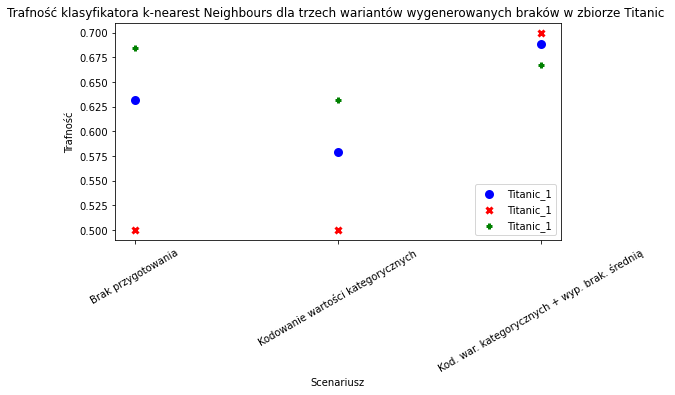

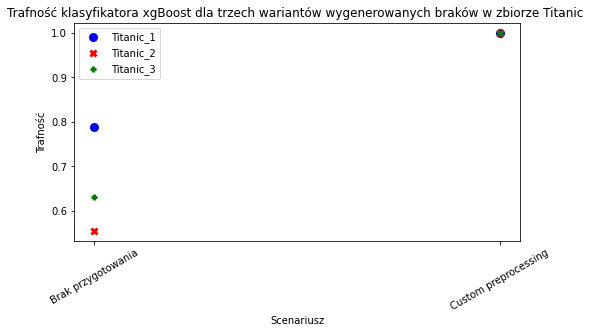

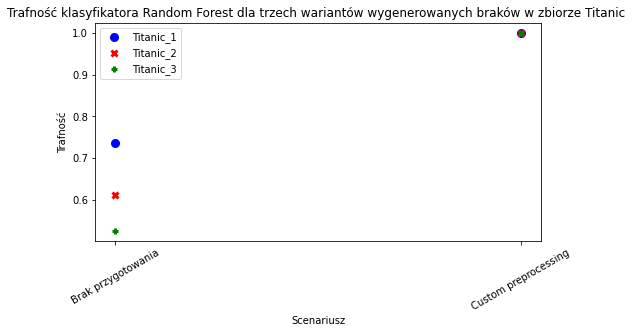

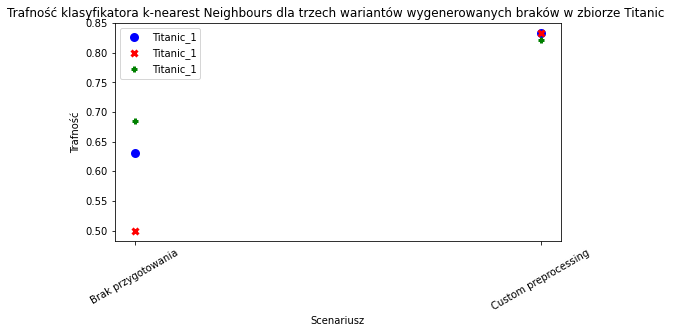

In [47]:
for group in results['group'].unique()[1:]:
        plot_xgb_score(get_group_results(titanic_1,
                                 group),
                        get_group_results(titanic_2,
                                 group),
                        get_group_results(titanic_3,
                                 group),
                                 "Trafność klasyfikatora xgBoost dla trzech wariantów wygenerowanych braków w zbiorze Titanic ",
                                 "Titanic_xgb_" + group)
        plot_rfc_score(get_group_results(titanic_1,
                                 group),
                        get_group_results(titanic_2,
                                 group),
                        get_group_results(titanic_3,
                                 group),
                                 "Trafność klasyfikatora Random Forest dla trzech wariantów wygenerowanych braków w zbiorze Titanic ",
                                 "Titanic_rfc_" + group)
        plot_knn_score(get_group_results(titanic_1,
                                 group),
                        get_group_results(titanic_2,
                                 group),
                        get_group_results(titanic_3,
                                 group),
                                 "Trafność klasyfikatora k-nearest Neighbours dla trzech wariantów wygenerowanych braków w zbiorze Titanic ",
                                 "Titanic_knn_" + group)

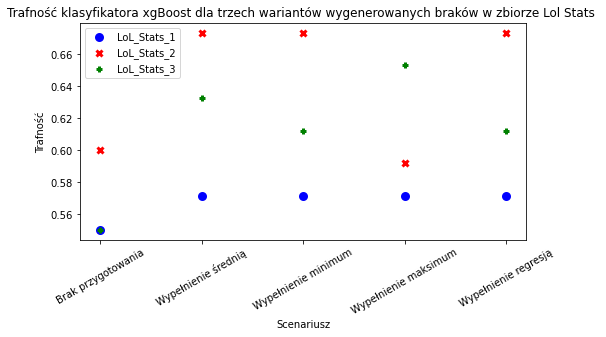

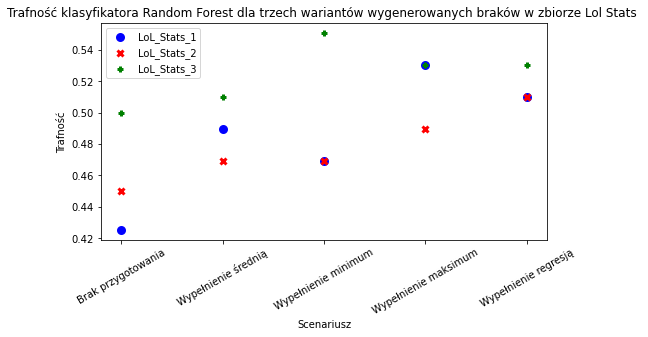

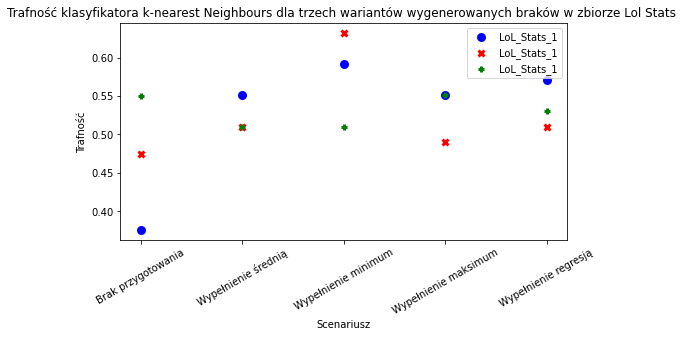

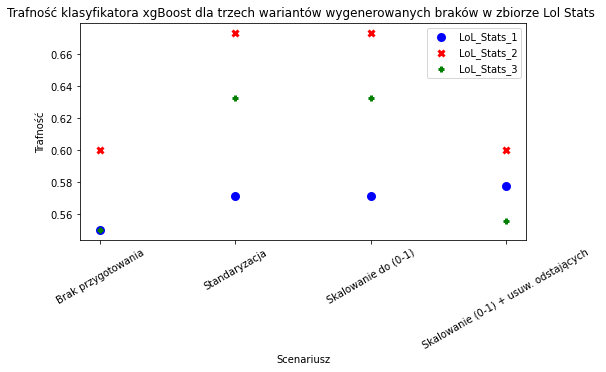

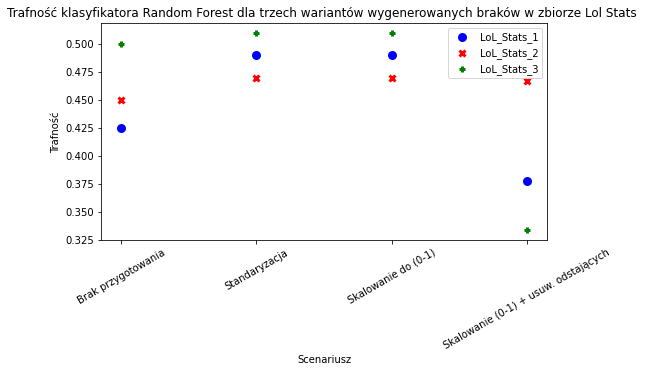

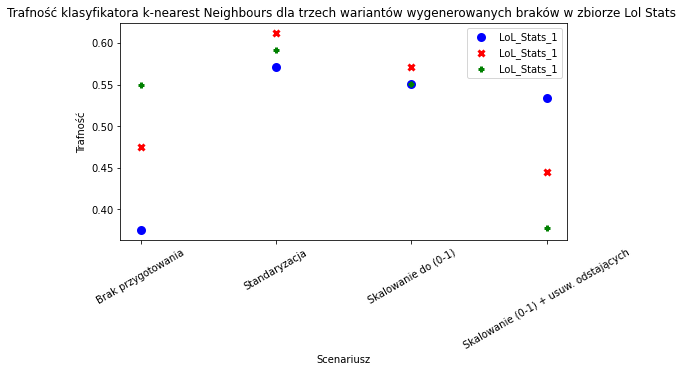

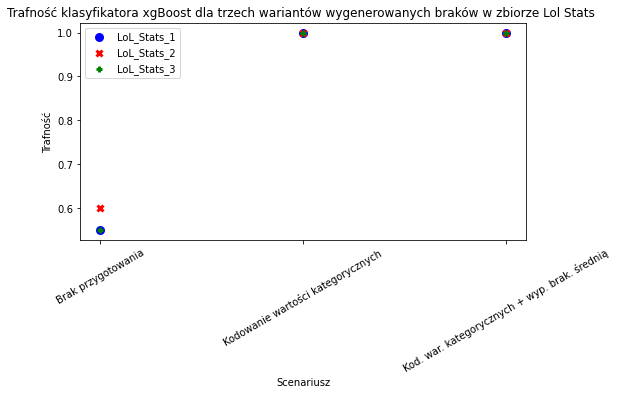

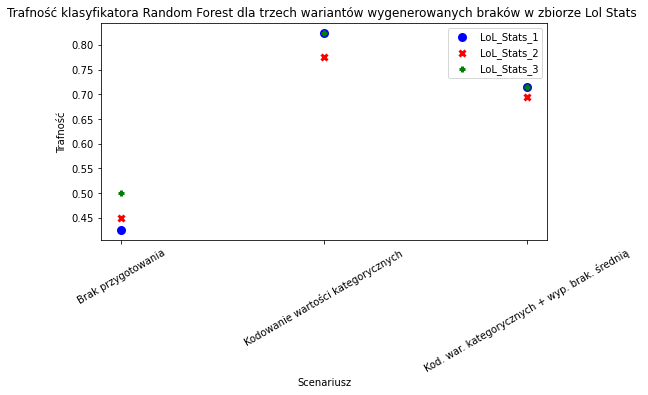

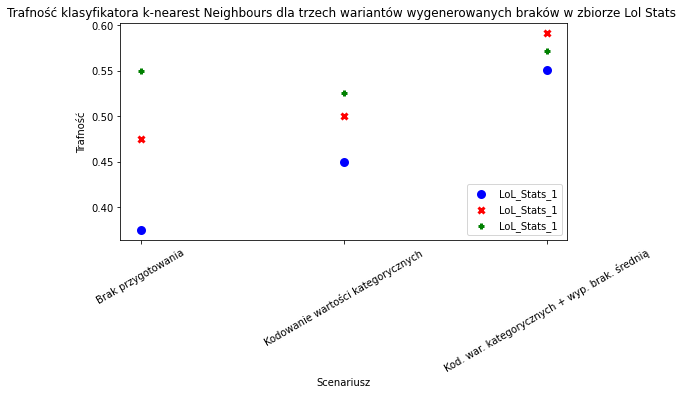

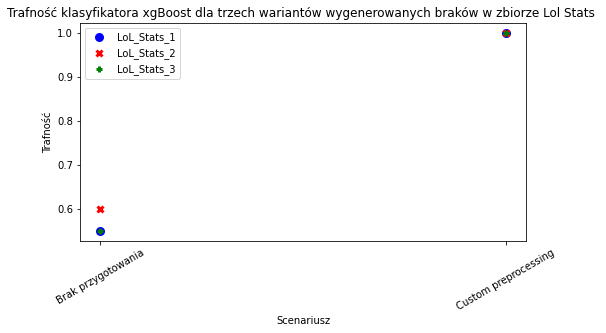

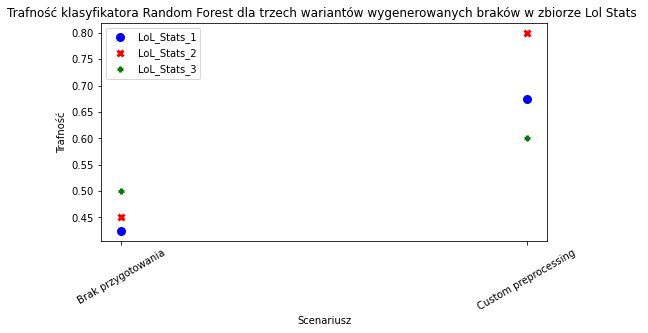

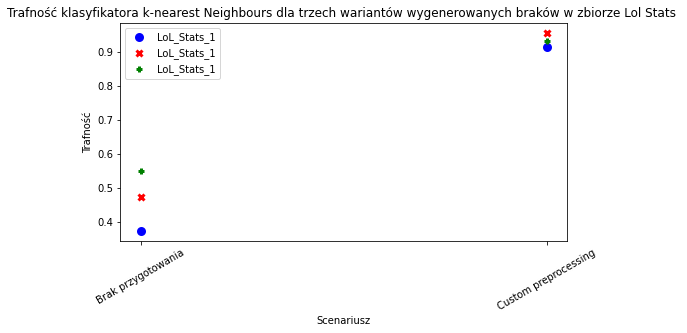

In [48]:
for group in results['group'].unique()[1:]:
        plot_xgb_score(get_group_results(lol_stats_1,
                                 group),
                        get_group_results(lol_stats_2,
                                 group),
                        get_group_results(lol_stats_3,
                                 group),
                                 "Trafność klasyfikatora xgBoost dla trzech wariantów wygenerowanych braków w zbiorze Lol Stats ",
                                 "Lol_stats_xgb_" + group)
        plot_rfc_score(get_group_results(lol_stats_1,
                                 group),
                        get_group_results(lol_stats_2,
                                 group),
                        get_group_results(lol_stats_3,
                                 group),
                                 "Trafność klasyfikatora Random Forest dla trzech wariantów wygenerowanych braków w zbiorze Lol Stats ",
                                 "Lol_stats_rfc_" + group)
        plot_knn_score(get_group_results(lol_stats_1,
                                 group),
                        get_group_results(lol_stats_2,
                                 group),
                        get_group_results(lol_stats_3,
                                 group),
                                 "Trafność klasyfikatora k-nearest Neighbours dla trzech wariantów wygenerowanych braków w zbiorze Lol Stats ",
                                 "Lol_stats_knn_" + group)

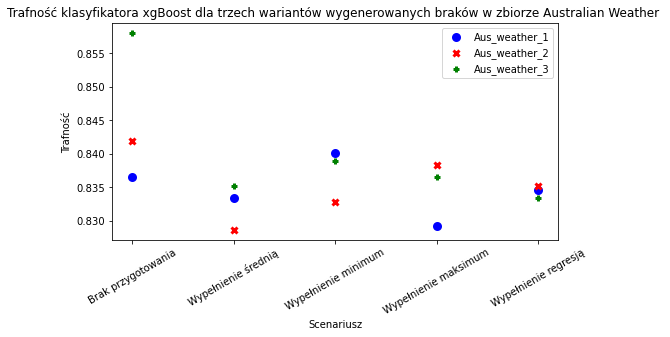

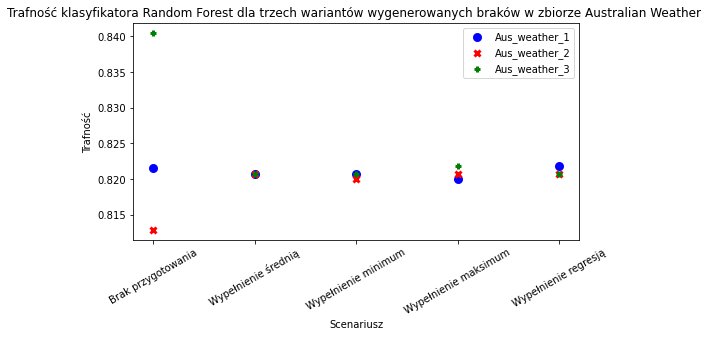

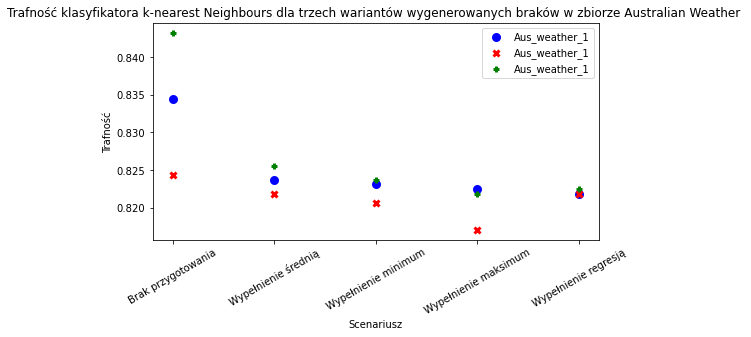

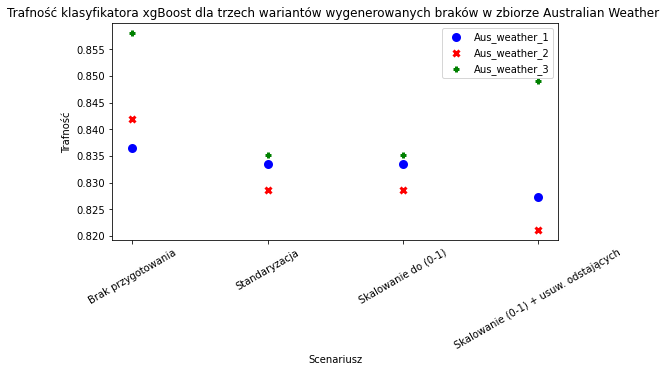

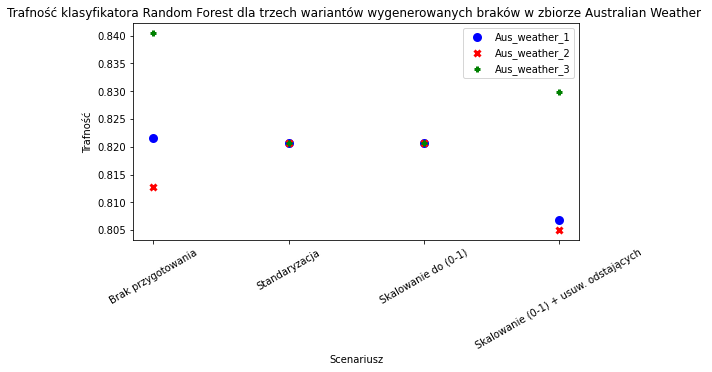

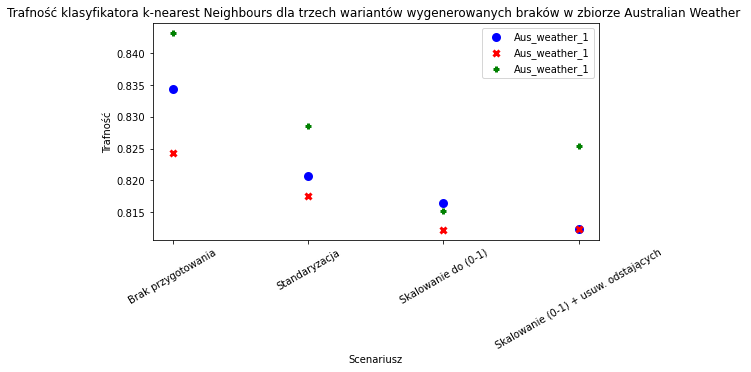

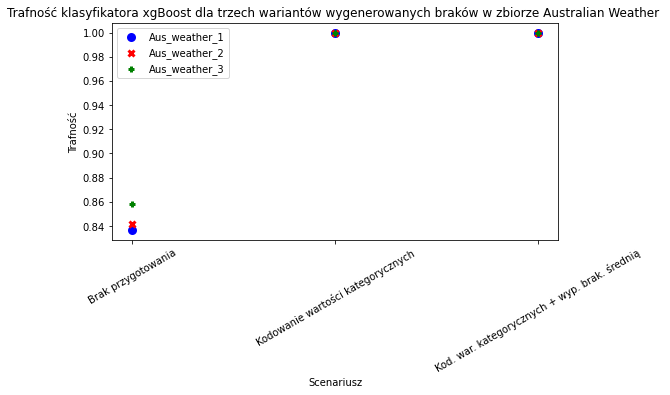

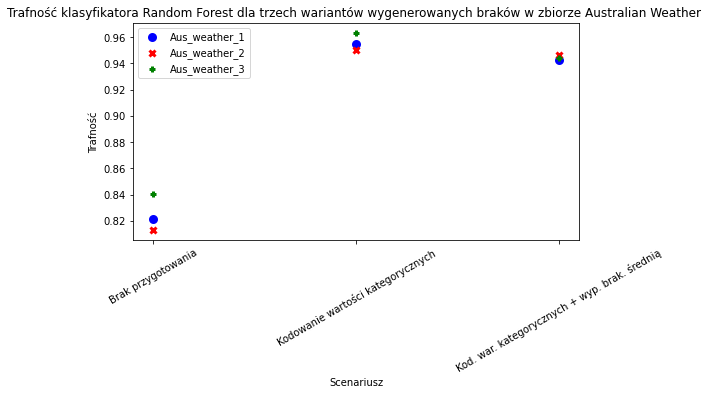

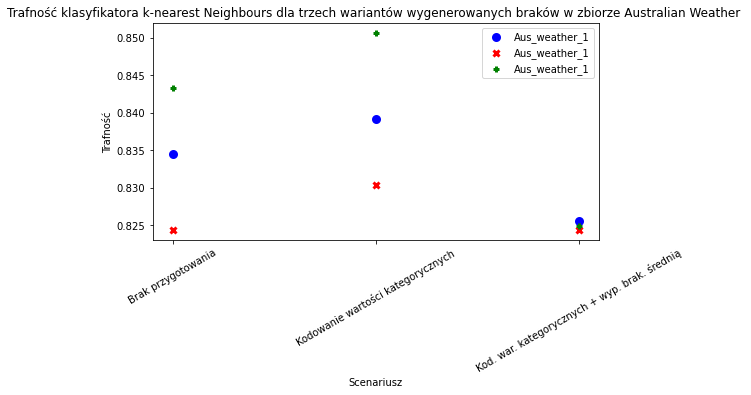

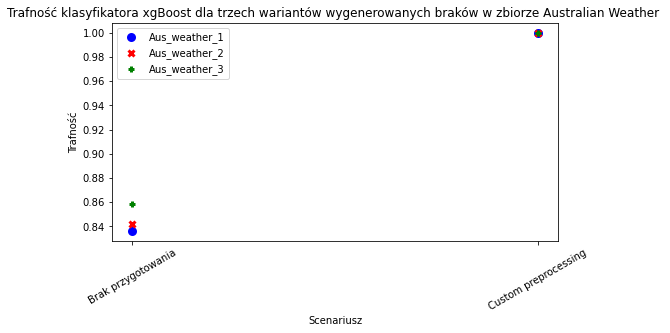

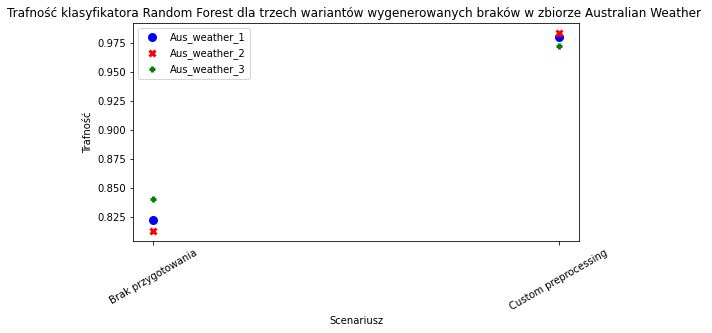

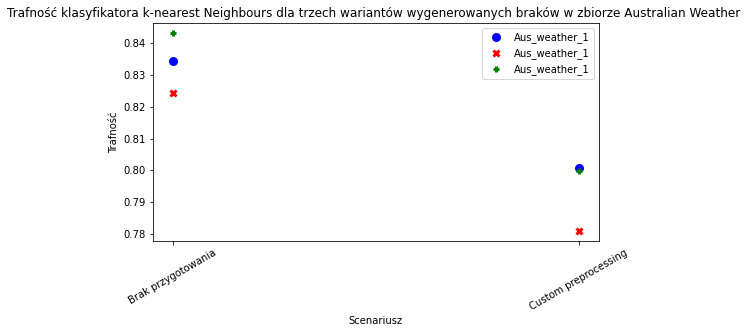

In [49]:
for group in results['group'].unique()[1:]:
        plot_xgb_score(get_group_results(aus_weather_1,
                                 group),
                        get_group_results(aus_weather_2,
                                 group),
                        get_group_results(aus_weather_3,
                                 group),
                                 "Trafność klasyfikatora xgBoost dla trzech wariantów wygenerowanych braków w zbiorze Australian Weather ",
                                 "Aus_Weather_xgb_" + group)
        plot_rfc_score(get_group_results(aus_weather_1,
                                 group),
                        get_group_results(aus_weather_2,
                                 group),
                        get_group_results(aus_weather_3,
                                 group),
                                 "Trafność klasyfikatora Random Forest dla trzech wariantów wygenerowanych braków w zbiorze Australian Weather ",
                                 "Aus_Weather_rfc_" + group)
        plot_knn_score(get_group_results(aus_weather_1,
                                 group),
                        get_group_results(aus_weather_2,
                                 group),
                        get_group_results(aus_weather_3,
                                 group),
                                 "Trafność klasyfikatora k-nearest Neighbours dla trzech wariantów wygenerowanych braków w zbiorze Australian Weather ",
                                 "Aus_Weather_knn_" + group)

In [50]:
results.loc[results['scenario'] == "Brak przygotowania"]

,org_dataset,dataset,group,scenario,xgb_score,rfc_score,knn_score,average_score,xgb_deviation,rfc_deviation,knn_deviation,xgb_dev_sq,rfc_dev_sq,knn_dev_sq,sum_of_sq,variance,std_dev,std_err
0,LoL_Stats,LoL_Stats_1,Brak,Brak przygotowania,0.550000,0.425000,0.375000,0.450000,0.100000,-0.025000,-0.075000,0.010000,0.000625,0.005625,0.016250,0.005417,0.073598,0.042492
4,LoL_Stats,LoL_Stats_2,Brak,Brak przygotowania,0.600000,0.450000,0.475000,0.508333,0.091667,-0.058333,-0.033333,0.008403,0.003403,0.001111,0.012917,0.004306,0.065617,0.037884
8,LoL_Stats,LoL_Stats_3,Brak,Brak przygotowania,0.550000,0.500000,0.550000,0.533333,0.016667,-0.033333,0.016667,0.000278,0.001111,0.000278,0.001667,0.000556,0.023570,0.013608
33,Aus_weather,Aus_weather_1,Brak,Brak przygotowania,0.836486,0.821622,0.834459,0.830856,0.005631,-0.009234,0.003604,0.000032,0.000085,0.000013,0.000130,0.000043,0.006582,0.003800
38,Aus_weather,Aus_weather_2,Brak,Brak przygotowania,0.841892,0.812838,0.824324,0.826351,0.015541,-0.013514,-0.002027,0.000242,0.000183,0.000004,0.000428,0.000143,0.011948,0.006898
43,Aus_weather,Aus_weather_3,Brak,Brak przygotowania,0.858108,0.840541,0.843243,0.847297,0.010811,-0.006757,-0.004054,0.000117,0.000046,0.000016,0.000179,0.000060,0.007724,0.004459
66,Titanic,Titanic_1,Brak,Brak przygotowania,0.789474,0.736842,0.631579,0.719298,0.070175,0.017544,-0.087719,0.004925,0.000308,0.007695,0.012927,0.004309,0.065643,0.037899
71,Titanic,Titanic_2,Brak,Brak przygotowania,0.555556,0.611111,0.500000,0.555556,0.000000,0.055556,-0.055556,0.000000,0.003086,0.003086,0.006173,0.002058,0.045361,0.026189
76,Titanic,Titanic_3,Brak,Brak przygotowania,0.631579,0.526316,0.684211,0.614035,0.017544,-0.087719,0.070175,0.000308,0.007695,0.004925,0.012927,0.004309,0.065643,0.037899


In [51]:
results.loc[(results['org_dataset'] == "LoL_Stats") & ((results['group'] == "Wypełnienie_brakujących") | (results['group'] == "Brak"))]

,org_dataset,dataset,group,scenario,xgb_score,rfc_score,knn_score,average_score,xgb_deviation,rfc_deviation,knn_deviation,xgb_dev_sq,rfc_dev_sq,knn_dev_sq,sum_of_sq,variance,std_dev,std_err
0,LoL_Stats,LoL_Stats_1,Brak,Brak przygotowania,0.550000,0.425000,0.375000,0.450000,0.100000,-0.025000,-0.075000,0.010000,0.000625,0.005625,0.016250,0.005417,0.073598,0.042492
1,LoL_Stats,LoL_Stats_1,Wypełnienie_brakujących,Wypełnienie średnią,0.571429,0.489796,0.551020,0.537415,0.034014,-0.047619,0.013605,0.001157,0.002268,0.000185,0.003610,0.001203,0.034687,0.020027
2,LoL_Stats,LoL_Stats_1,Wypełnienie_brakujących,Wypełnienie minimum,0.571429,0.469388,0.591837,0.544218,0.027211,-0.074830,0.047619,0.000740,0.005600,0.002268,0.008608,0.002869,0.053565,0.030926
3,LoL_Stats,LoL_Stats_1,Wypełnienie_brakujących,Wypełnienie maksimum,0.571429,0.530612,0.551020,0.551020,0.020408,-0.020408,0.000000,0.000416,0.000416,0.000000,0.000833,0.000278,0.016663,0.009621
4,LoL_Stats,LoL_Stats_2,Brak,Brak przygotowania,0.600000,0.450000,0.475000,0.508333,0.091667,-0.058333,-0.033333,0.008403,0.003403,0.001111,0.012917,0.004306,0.065617,0.037884
5,LoL_Stats,LoL_Stats_2,Wypełnienie_brakujących,Wypełnienie średnią,0.673469,0.469388,0.510204,0.551020,0.122449,-0.081633,-0.040816,0.014994,0.006664,0.001666,0.023324,0.007775,0.088173,0.050907
6,LoL_Stats,LoL_Stats_2,Wypełnienie_brakujących,Wypełnienie minimum,0.673469,0.469388,0.632653,0.591837,0.081633,-0.122449,0.040816,0.006664,0.014994,0.001666,0.023324,0.007775,0.088173,0.050907
7,LoL_Stats,LoL_Stats_2,Wypełnienie_brakujących,Wypełnienie maksimum,0.591837,0.489796,0.489796,0.523810,0.068027,-0.034014,-0.034014,0.004628,0.001157,0.001157,0.006942,0.002314,0.048103,0.027772
8,LoL_Stats,LoL_Stats_3,Brak,Brak przygotowania,0.550000,0.500000,0.550000,0.533333,0.016667,-0.033333,0.016667,0.000278,0.001111,0.000278,0.001667,0.000556,0.023570,0.013608
9,LoL_Stats,LoL_Stats_3,Wypełnienie_brakujących,Wypełnienie średnią,0.632653,0.510204,0.510204,0.551020,0.081633,-0.040816,-0.040816,0.006664,0.001666,0.001666,0.009996,0.003332,0.057723,0.033326


['Brak przygotowania' 'Wypełnienie średnią' 'Wypełnienie minimum'
 'Wypełnienie maksimum' 'Wypełnienie regresją']
33    0.836486
34    0.833435
35    0.840122
36    0.829179
37    0.834650
Name: xgb_score, dtype: float64


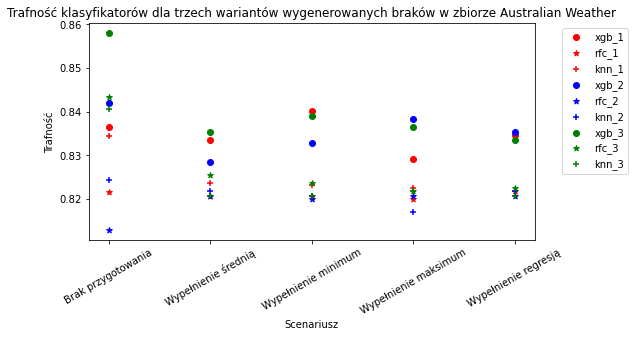

['Brak przygotowania' 'Standaryzacja' 'Skalowanie do (0-1)'
 'Skalowanie (0-1) + usuw. odstających']
33    0.836486
48    0.833435
49    0.833435
50    0.827245
Name: xgb_score, dtype: float64


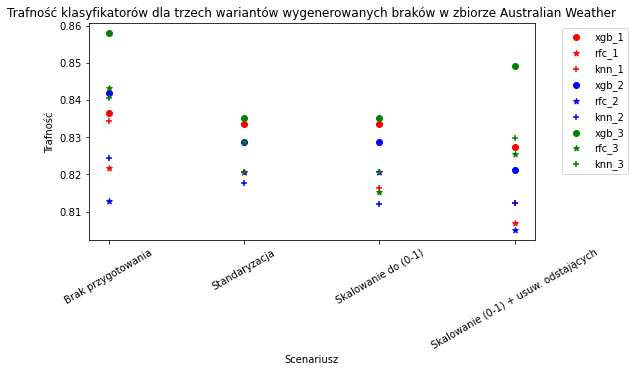

['Brak przygotowania' 'Kodowanie wartości kategorycznych'
 'Kod. war. kategorycznych + wyp. brak. średnią']
33    0.836486
57    1.000000
58    1.000000
Name: xgb_score, dtype: float64


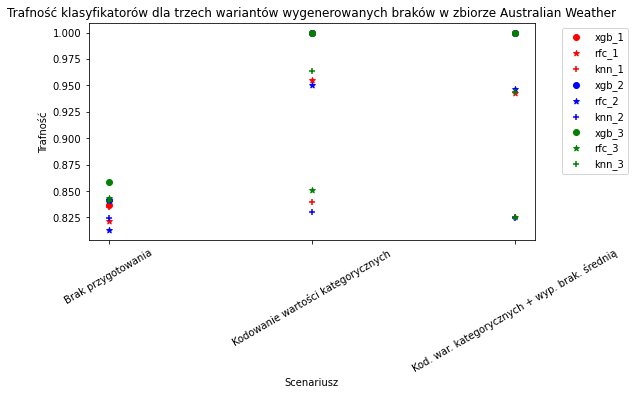

['Brak przygotowania' 'Custom preprocessing']
33    0.836486
59    1.000000
Name: xgb_score, dtype: float64


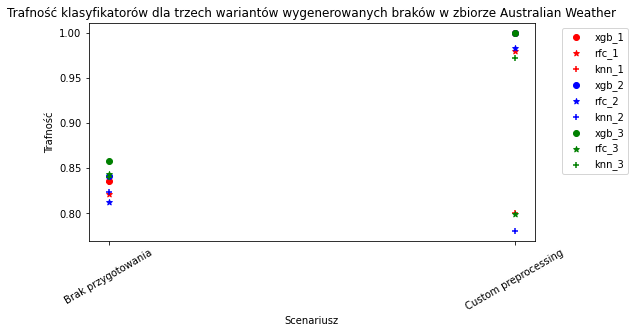

In [52]:
for group in results['group'].unique()[1:]:
        plot_group(get_dataset_group_results("Aus_weather",group),
                                 "Aus_weather",
                                 "Trafność klasyfikatorów dla trzech wariantów wygenerowanych braków w zbiorze Australian Weather",
                                 "Aus_Weather_" + group)

['Brak przygotowania' 'Wypełnienie średnią' 'Wypełnienie minimum'
 'Wypełnienie maksimum' 'Wypełnienie regresją']
0     0.550000
1     0.571429
2     0.571429
3     0.571429
12    0.571429
Name: xgb_score, dtype: float64


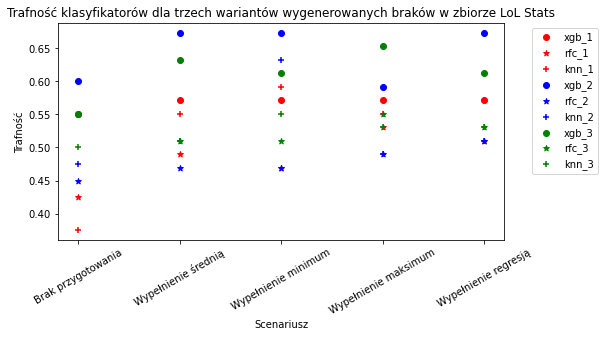

['Brak przygotowania' 'Standaryzacja' 'Skalowanie do (0-1)'
 'Skalowanie (0-1) + usuw. odstających']
0     0.550000
15    0.571429
16    0.571429
17    0.577778
Name: xgb_score, dtype: float64


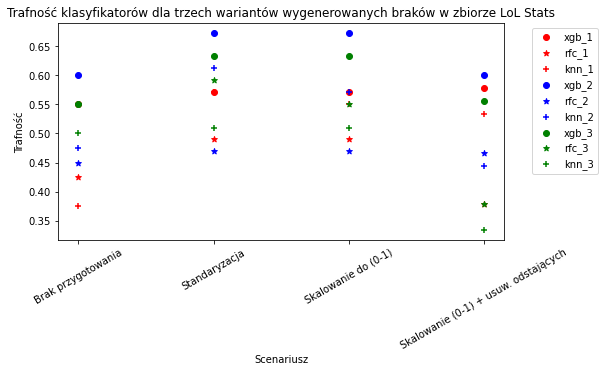

['Brak przygotowania' 'Kodowanie wartości kategorycznych'
 'Kod. war. kategorycznych + wyp. brak. średnią']
0     0.55
24    1.00
25    1.00
Name: xgb_score, dtype: float64


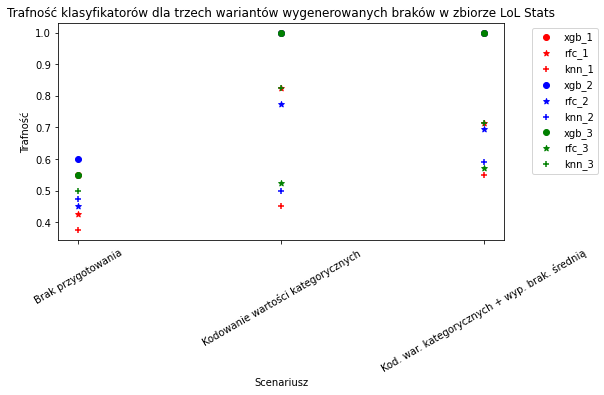

['Brak przygotowania' 'Custom preprocessing']
0     0.55
26    1.00
Name: xgb_score, dtype: float64


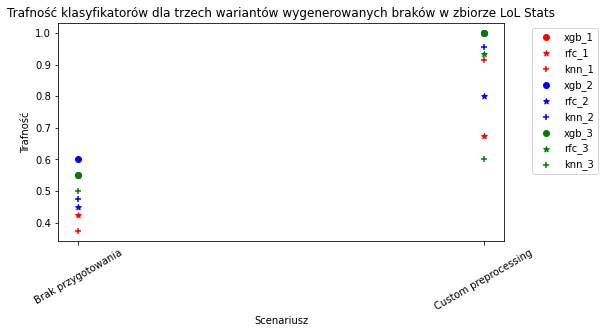

In [53]:
for group in results['group'].unique()[1:]:
        plot_group(get_dataset_group_results("LoL_Stats",group),
                                 "LoL_Stats",
                                 "Trafność klasyfikatorów dla trzech wariantów wygenerowanych braków w zbiorze LoL Stats",
                                 "LoL_Stats_" + group)

['Brak przygotowania' 'Wypełnienie średnią' 'Wypełnienie minimum'
 'Wypełnienie maksimum' 'Wypełnienie regresją']
66    0.789474
67    0.733333
68    0.722222
69    0.677778
70    0.766667
Name: xgb_score, dtype: float64


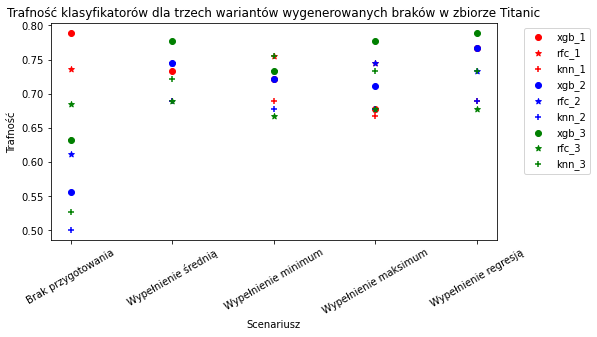

['Brak przygotowania' 'Standaryzacja' 'Skalowanie do (0-1)'
 'Skalowanie (0-1) + usuw. odstających']
66    0.789474
81    0.733333
82    0.733333
83    0.609375
Name: xgb_score, dtype: float64


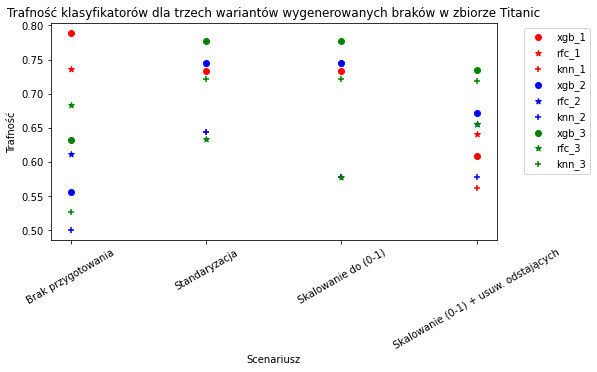

['Brak przygotowania' 'Kodowanie wartości kategorycznych'
 'Kod. war. kategorycznych + wyp. brak. średnią']
66    0.789474
90    1.000000
91    1.000000
Name: xgb_score, dtype: float64


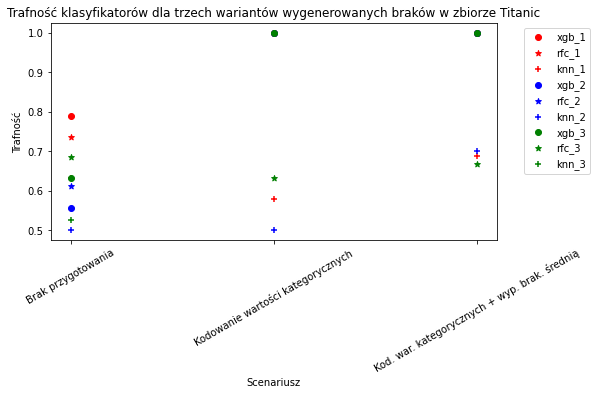

['Brak przygotowania' 'Custom preprocessing']
66    0.789474
92    1.000000
Name: xgb_score, dtype: float64


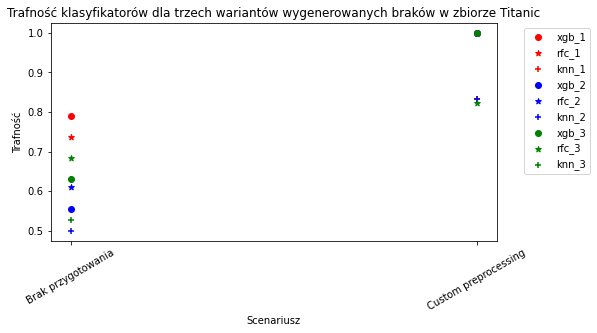

In [54]:
for group in results['group'].unique()[1:]:
        plot_group(get_dataset_group_results("Titanic",group),
                                 "Titanic",
                                 "Trafność klasyfikatorów dla trzech wariantów wygenerowanych braków w zbiorze Titanic",
                                 "Titanic_" + group)

In [55]:
results['group'].unique()

array(['Brak', 'Wypełnienie_brakujących', 'Standaryzacja', 'Kodowanie',
       'Custom'], dtype=object)

In [56]:
results['org_dataset'].unique()

array(['LoL_Stats', 'Aus_weather', 'Titanic'], dtype=object)

In [57]:
get_dataset_group_results("LoL_Stats","Wypełnienie_brakujących")

,org_dataset,dataset,group,scenario,xgb_score,rfc_score,knn_score,average_score,xgb_deviation,rfc_deviation,knn_deviation,xgb_dev_sq,rfc_dev_sq,knn_dev_sq,sum_of_sq,variance,std_dev,std_err
0,LoL_Stats,LoL_Stats_1,Brak,Brak przygotowania,0.550000,0.425000,0.375000,0.450000,0.100000,-0.025000,-0.075000,0.010000,0.000625,0.005625,0.016250,0.005417,0.073598,0.042492
1,LoL_Stats,LoL_Stats_1,Wypełnienie_brakujących,Wypełnienie średnią,0.571429,0.489796,0.551020,0.537415,0.034014,-0.047619,0.013605,0.001157,0.002268,0.000185,0.003610,0.001203,0.034687,0.020027
2,LoL_Stats,LoL_Stats_1,Wypełnienie_brakujących,Wypełnienie minimum,0.571429,0.469388,0.591837,0.544218,0.027211,-0.074830,0.047619,0.000740,0.005600,0.002268,0.008608,0.002869,0.053565,0.030926
3,LoL_Stats,LoL_Stats_1,Wypełnienie_brakujących,Wypełnienie maksimum,0.571429,0.530612,0.551020,0.551020,0.020408,-0.020408,0.000000,0.000416,0.000416,0.000000,0.000833,0.000278,0.016663,0.009621
4,LoL_Stats,LoL_Stats_2,Brak,Brak przygotowania,0.600000,0.450000,0.475000,0.508333,0.091667,-0.058333,-0.033333,0.008403,0.003403,0.001111,0.012917,0.004306,0.065617,0.037884
5,LoL_Stats,LoL_Stats_2,Wypełnienie_brakujących,Wypełnienie średnią,0.673469,0.469388,0.510204,0.551020,0.122449,-0.081633,-0.040816,0.014994,0.006664,0.001666,0.023324,0.007775,0.088173,0.050907
6,LoL_Stats,LoL_Stats_2,Wypełnienie_brakujących,Wypełnienie minimum,0.673469,0.469388,0.632653,0.591837,0.081633,-0.122449,0.040816,0.006664,0.014994,0.001666,0.023324,0.007775,0.088173,0.050907
7,LoL_Stats,LoL_Stats_2,Wypełnienie_brakujących,Wypełnienie maksimum,0.591837,0.489796,0.489796,0.523810,0.068027,-0.034014,-0.034014,0.004628,0.001157,0.001157,0.006942,0.002314,0.048103,0.027772
8,LoL_Stats,LoL_Stats_3,Brak,Brak przygotowania,0.550000,0.500000,0.550000,0.533333,0.016667,-0.033333,0.016667,0.000278,0.001111,0.000278,0.001667,0.000556,0.023570,0.013608
9,LoL_Stats,LoL_Stats_3,Wypełnienie_brakujących,Wypełnienie średnią,0.632653,0.510204,0.510204,0.551020,0.081633,-0.040816,-0.040816,0.006664,0.001666,0.001666,0.009996,0.003332,0.057723,0.033326
